<a href="https://colab.research.google.com/github/FrK06/Traditional-ML/blob/main/Traditional_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dario Di Nuzzo**

**Student ID: 23226607**

**Machine Learning: CMP7228**

In [ ]:
import pandas as pd

# Loading the dataset to explore and suggest a new variable
file_path = '/content/online_shoppers_intention.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset to understand its structure and existing features
data.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [ ]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [ ]:
# Checking for missing or null values in the dataset
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [ ]:
# Checking for NaN values across the entire dataset
nan_values_total = data.isna().sum().sum()
nan_values_total

0

In [ ]:
# Checking for duplicate rows in the dataset
duplicate_rows = data.duplicated().sum()
duplicate_rows

125

In [ ]:
# Dropping duplicate rows
data = data.drop_duplicates()
duplicate_rows = data.duplicated().sum()
duplicate_rows

0



---


# **Descriptive Statistics**


---



In [ ]:
# Descriptive statistics
print(data.describe())

       Administrative  Administrative_Duration  Informational  \
count    12205.000000             12205.000000   12205.000000   
mean         2.338878                81.646331       0.508726   
std          3.330436               177.491845       1.275617   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 9.000000       0.000000   
75%          4.000000                94.700000       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12205.000000    12205.000000             12205.000000   
mean                34.825454       32.045637              1206.982457   
std                141.424807       44.593649              1919.601400   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        8.00000

Descriptive statistics provide summary measures that describe the main features of a dataset, helping us to understand its basic characteristics.

**Count:**

This is the number of non-missing values in each column. A consistent count across columns, as seen here (12,205 for each), indicates no missing values in these columns.

**Mean (Average):**

This is the sum of all values in a column divided by the number of values. For example, the mean of Administrative is approximately 2.34, indicating that, on average, visitors interacted with administrative pages about 2-3 times per session.

**Standard Deviation (Std):**

This measures the amount of variation or dispersion in a set of values. A low standard deviation means that the values tend to be close to the mean, while a high standard deviation means that the values are spread out over a wider range. For instance, ProductRelated_Duration has a high standard deviation (approximately 1919.60), indicating significant variation in the time spent on product-related pages among different visitors.

**Min and Max:**

These values show the minimum and maximum values in each column. They help identify the range of the data. For example, SpecialDay ranges from 0 to 1, which suggests it could be a binary indicator.

**Quartiles (25%, 50%, 75%):**

Quartiles divide the data into four equal parts. The 25th percentile, also known as the first quartile, is the value below which 25% of the data is found. This represents the lower-middle portion of the dataset. The 50th percentile, or the median, is the middle value, with half of the data falling below it. This provides a central point of the data distribution. The 75th percentile, or the third quartile, is the value below which 75% of the data lies, marking the upper-middle portion. For instance, in the Informational_Duration column, the 50th percentile (median) is 0, indicating that at least half of the user sessions did not involve any time spent on informational pages.



---


# **Univariate Analysis**


---



## Quantitative Data

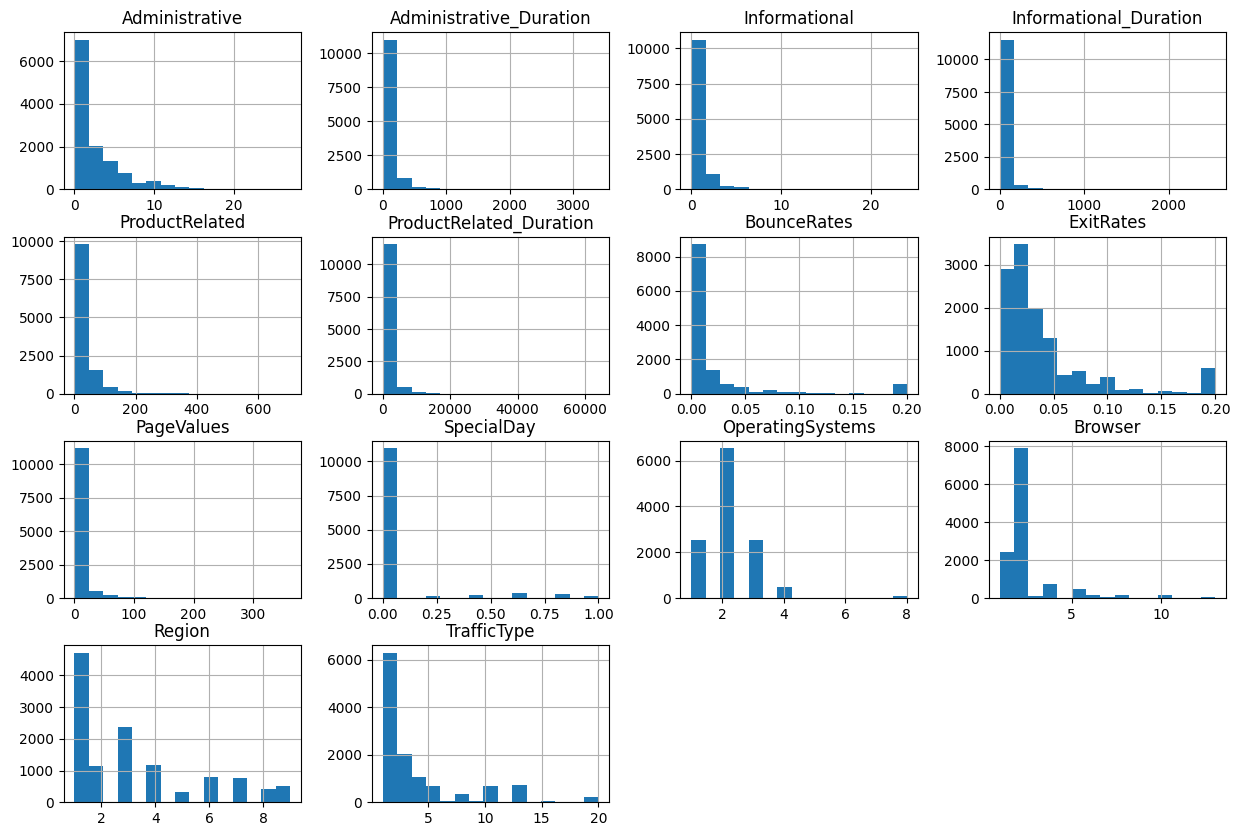

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
data.hist(bins=15, figsize=(15, 10))
plt.show()

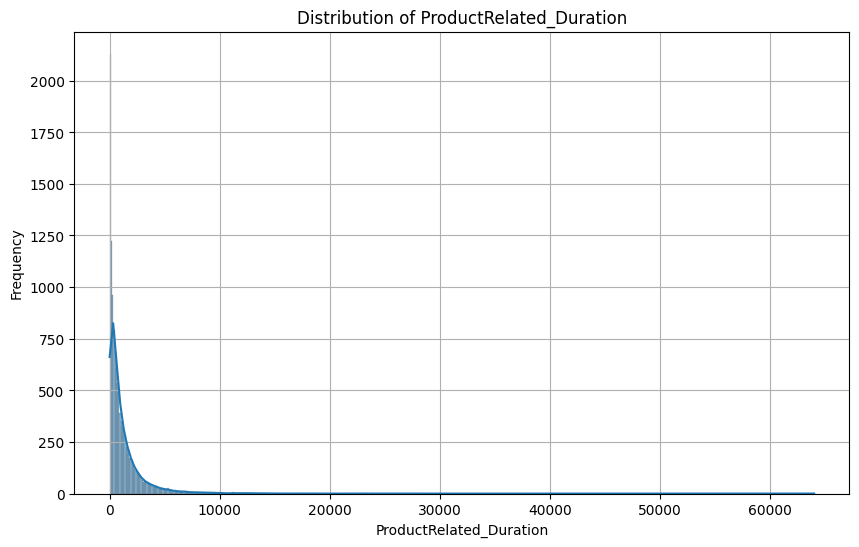

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable 'ProductRelated_Duration'
plt.figure(figsize=(10, 6))
sns.histplot(data['ProductRelated_Duration'], kde=True)
plt.title('Distribution of ProductRelated_Duration')
plt.xlabel('ProductRelated_Duration')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

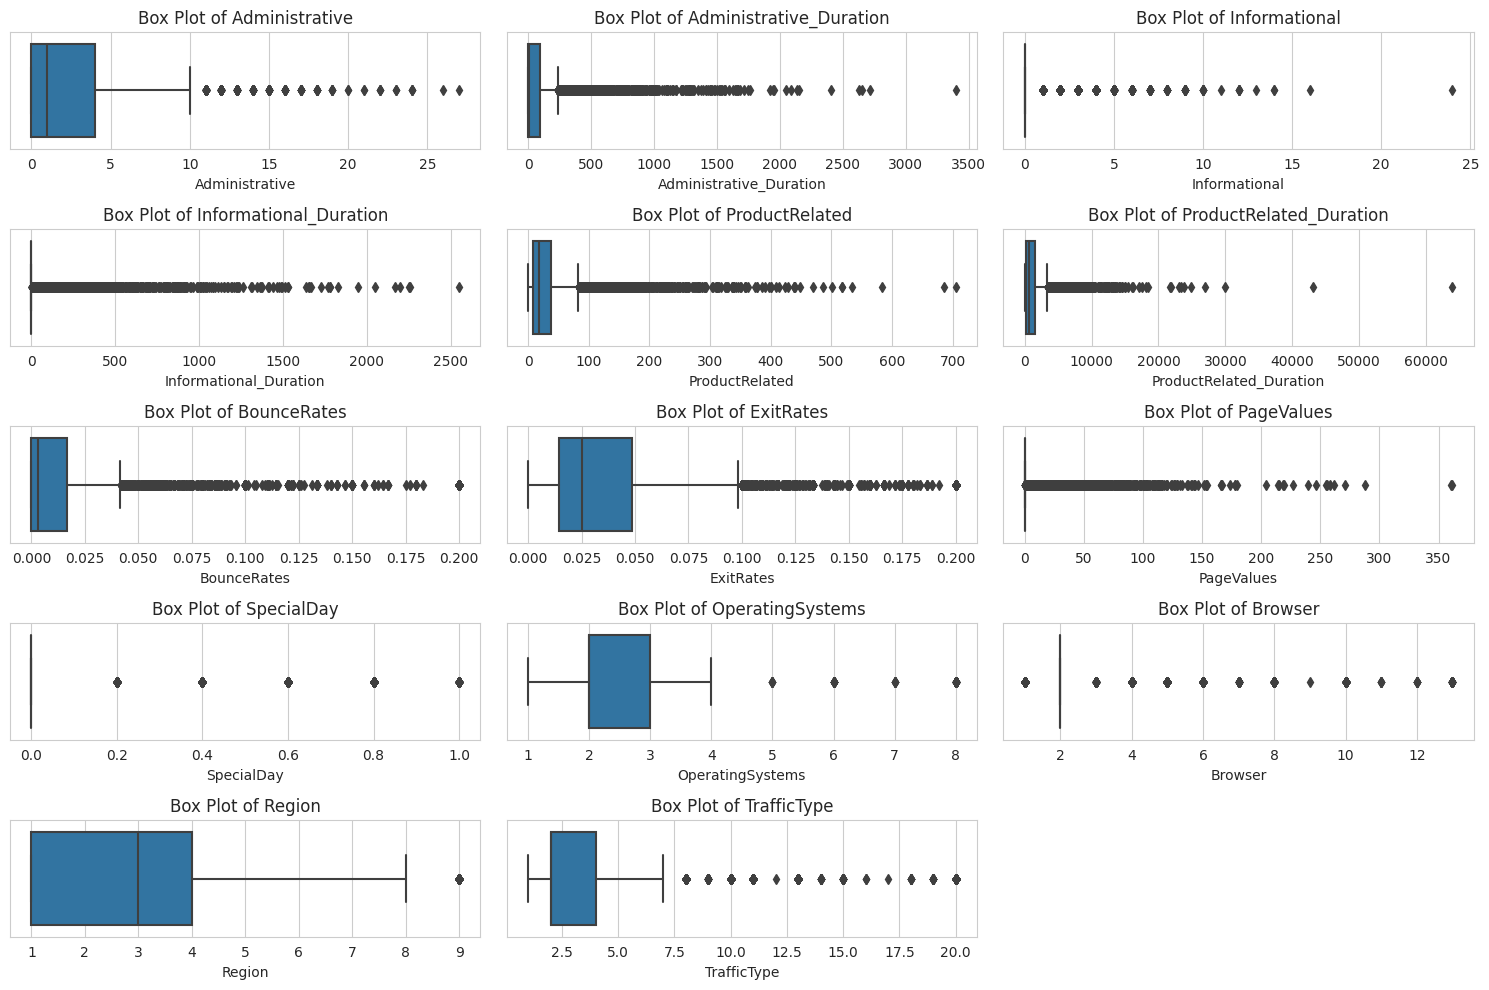

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Creating a box plot for each numerical column
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

sns.set_style("whitegrid")

# Enhancing the plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)
    sns.boxplot(x=col, data=data)
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

## Categorical Data

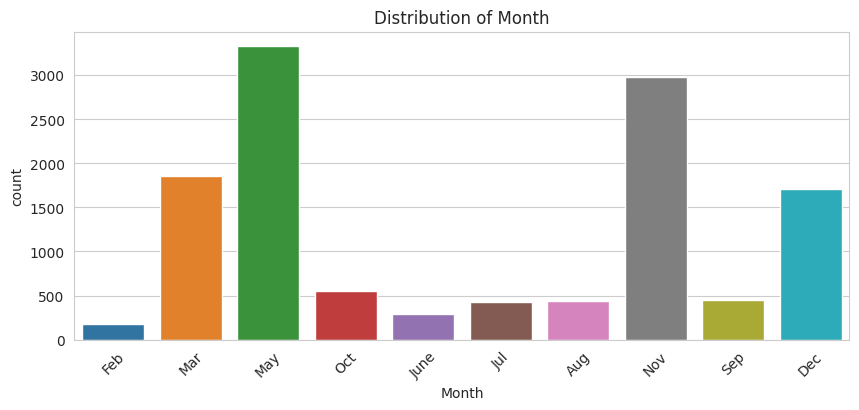

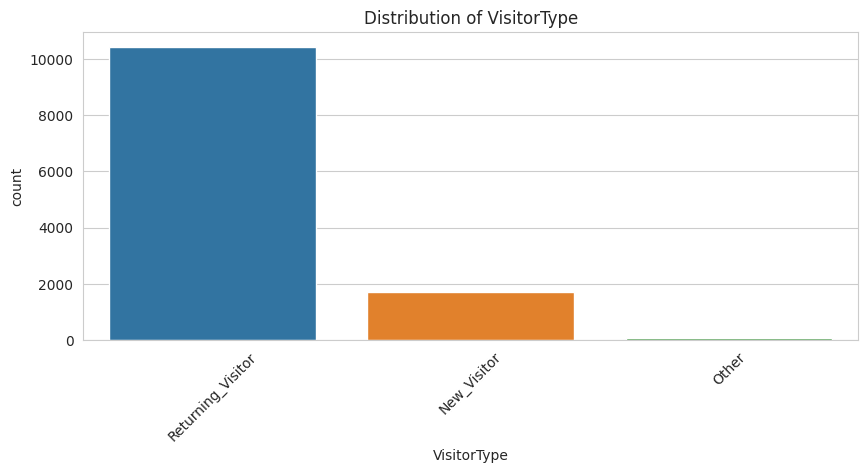

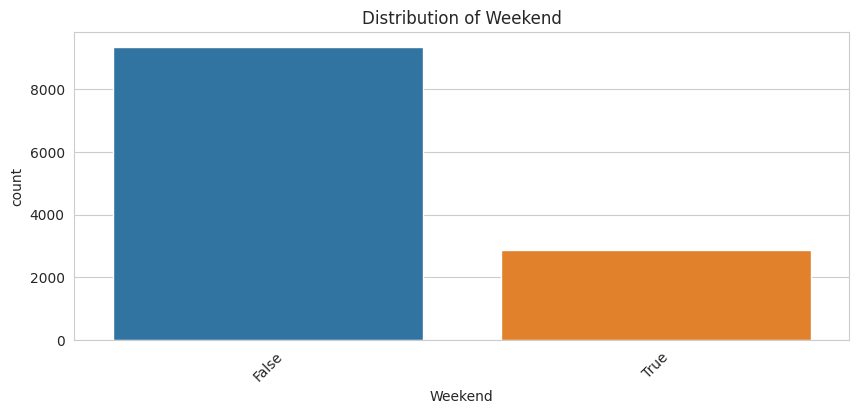

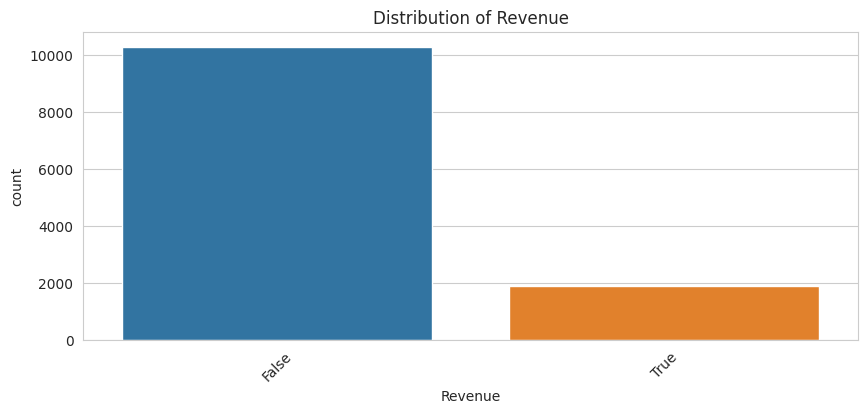

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# creating a count plot for each categorical column
categorical_cols = data.select_dtypes(include=['object', 'bool']).columns

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()



---

# **Bivariate Analysis**

---



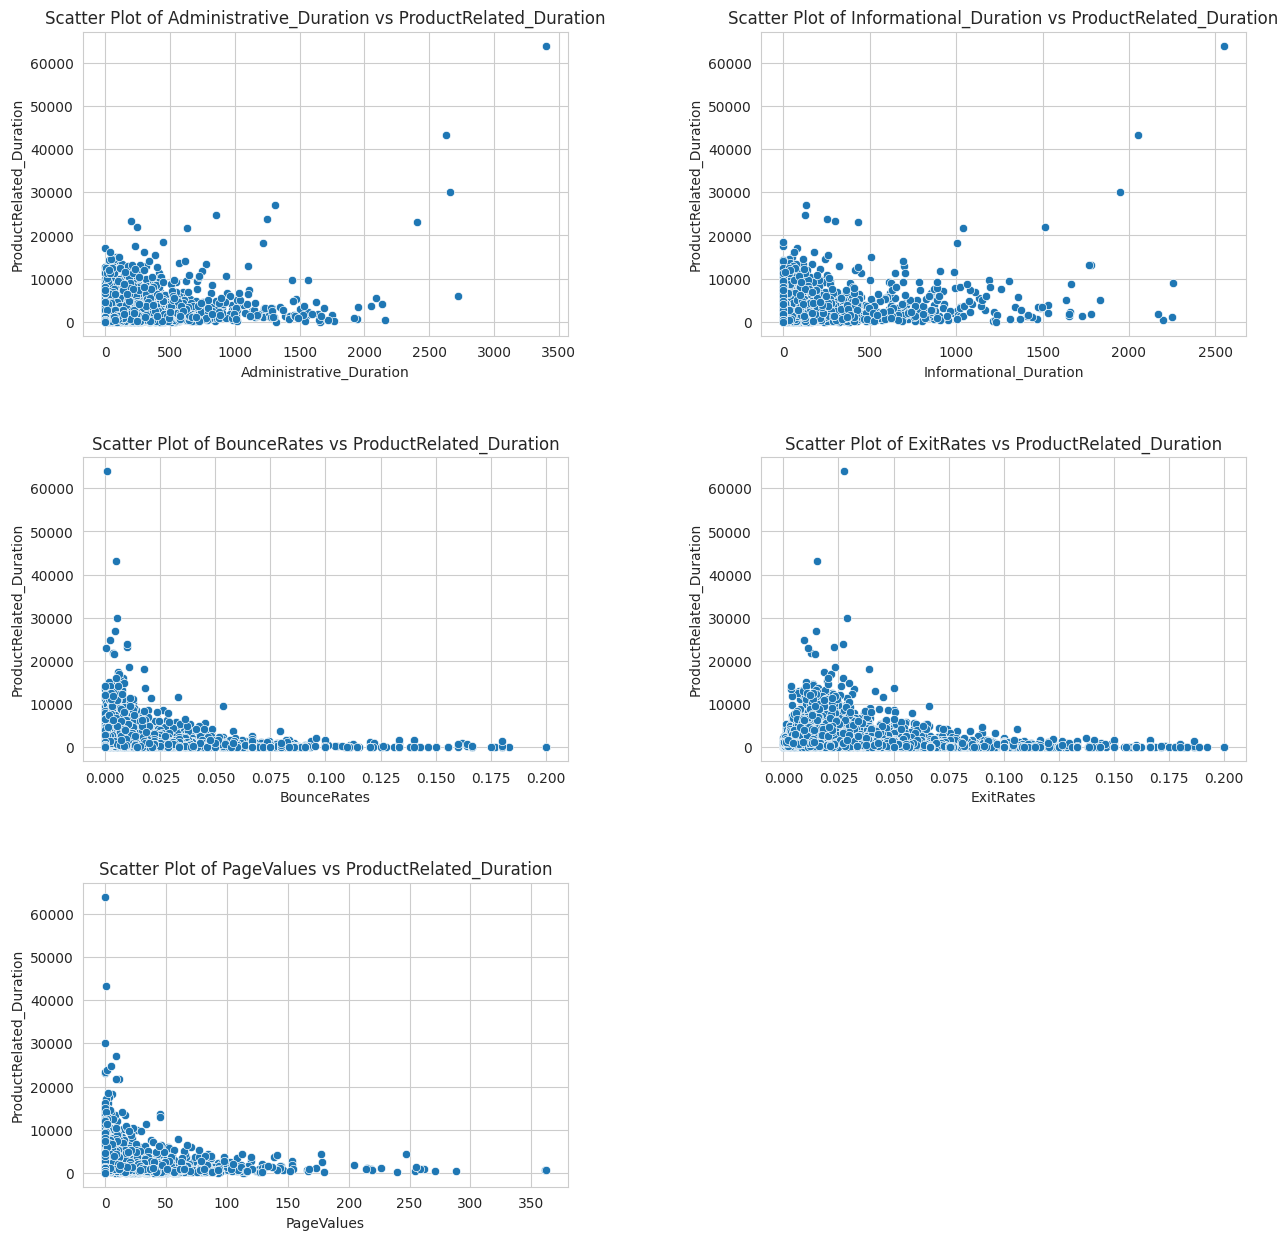

In [ ]:
# For a regression task, we are interested in how numerical features relate to the target variable.
# Selecting a few numerical features that might have a strong relationship with 'ProductRelated_Duration'
# Additionally, I'll create boxplots for the categorical features to see their distribution with respect to the target.

# Numerical features to plot against 'ProductRelated_Duration'
numerical_features = ['Administrative_Duration', 'Informational_Duration', 'BounceRates', 'ExitRates', 'PageValues']

sns.set_style("whitegrid")

# Create scatter plots for numerical features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axes = axes.ravel()  # Turn axes into a 1D array

for idx, feature in enumerate(numerical_features):
    sns.scatterplot(ax=axes[idx], data=data, x=feature, y='ProductRelated_Duration')
    axes[idx].set_title(f'Scatter Plot of {feature} vs ProductRelated_Duration')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('ProductRelated_Duration')

# Hide the last subplot (if the number of features is odd)
if len(numerical_features) % 2 != 0:
    fig.delaxes(axes[-1])

plt.show()

**Scatter Plots Observations:**

Administrative_Duration vs ProductRelated_Duration: There seems to be a positive trend; as the administrative duration increases, the product-related duration also tends to increase, although there is a lot of variance.

**Informational_Duration vs ProductRelated_Duration:**

A similar positive trend is observed here, albeit with a wide spread of points.

**BounceRates vs ProductRelated_Duration:**

As expected, there's a negative relationship; higher bounce rates generally correspond to lower product-related duration.

**ExitRates vs ProductRelated_Duration:**

This plot also shows a negative relationship, similar to bounce rates.

**PageValues vs ProductRelated_Duration:**

There appears to be a cluster of high product-related duration with lower page values, but there are also some higher values that suggest a complex relationship.

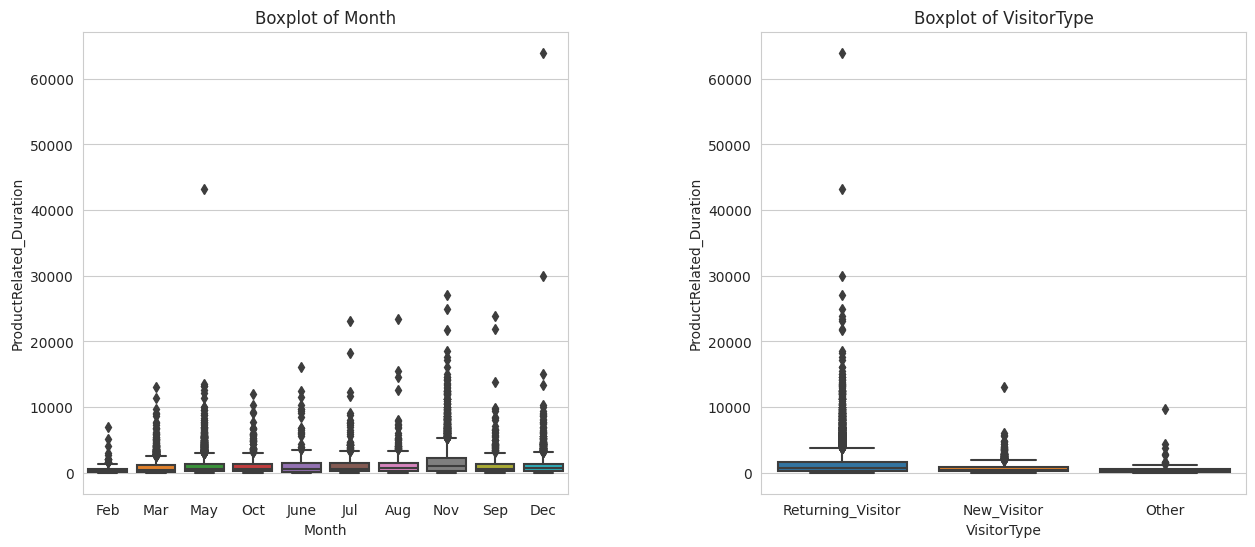

In [ ]:
# creating boxplots for the categorical features 'Month' and 'VisitorType'
categorical_features = ['Month', 'VisitorType']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for idx, feature in enumerate(categorical_features):
    sns.boxplot(ax=axes[idx], x=feature, y='ProductRelated_Duration', data=data)
    axes[idx].set_title(f'Boxplot of {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('ProductRelated_Duration')

plt.show()

Month:

The distribution of product-related duration varies with the month, suggesting seasonality effects. Some months show a wider interquartile range, indicating more variability in how long users interact with product-related pages.


VisitorType:

Different types of visitors exhibit differences in product-related duration, with returning visitors showing a larger interquartile range than new visitors.

# **Revenue Analysis**

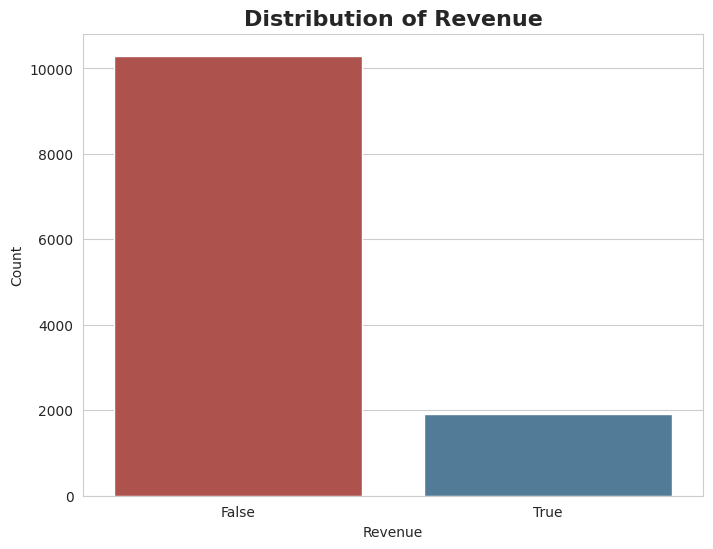

False    10297
True      1908
Name: Revenue, dtype: int64

In [ ]:
# Creating a count plot to understand the distribution of 'Revenue'
plt.figure(figsize=(8, 6))
sns.countplot(x='Revenue', data=data, palette=["#BE433D","#467DA4"])
plt.title('Distribution of Revenue', fontsize=16, fontweight='bold')
plt.ylabel('Count')
plt.xlabel('Revenue')
plt.show()

revenue_counts = data['Revenue'].value_counts()
revenue_counts

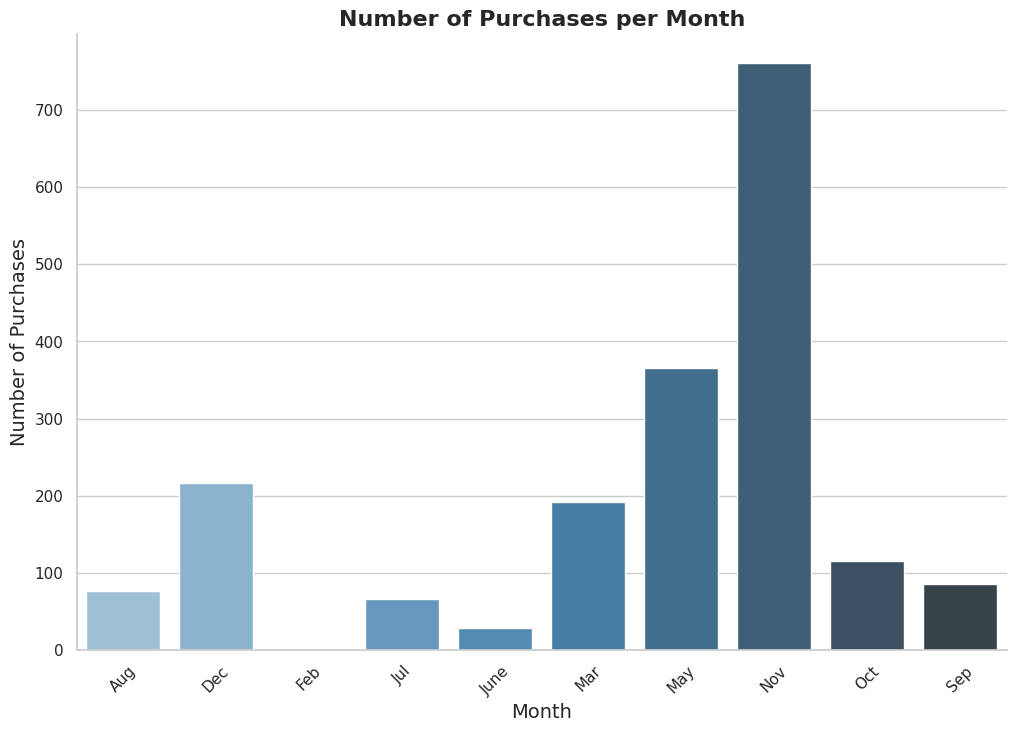

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Creating a plot to show the number of purchases for each month
# Grouping the data by 'Month' and count the number of purchases (True in 'Revenue')
purchases_per_month = data.groupby('Month')['Revenue'].sum()

# Setting a more appealing style
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=purchases_per_month.index, y=purchases_per_month.values, palette="Blues_d")
plt.title('Number of Purchases per Month', fontsize=16, fontweight='bold')
plt.ylabel('Number of Purchases', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.xticks(rotation=45)
sns.despine()  # Removing the top and right spines for a cleaner look

# Displaying the plot
plt.show()

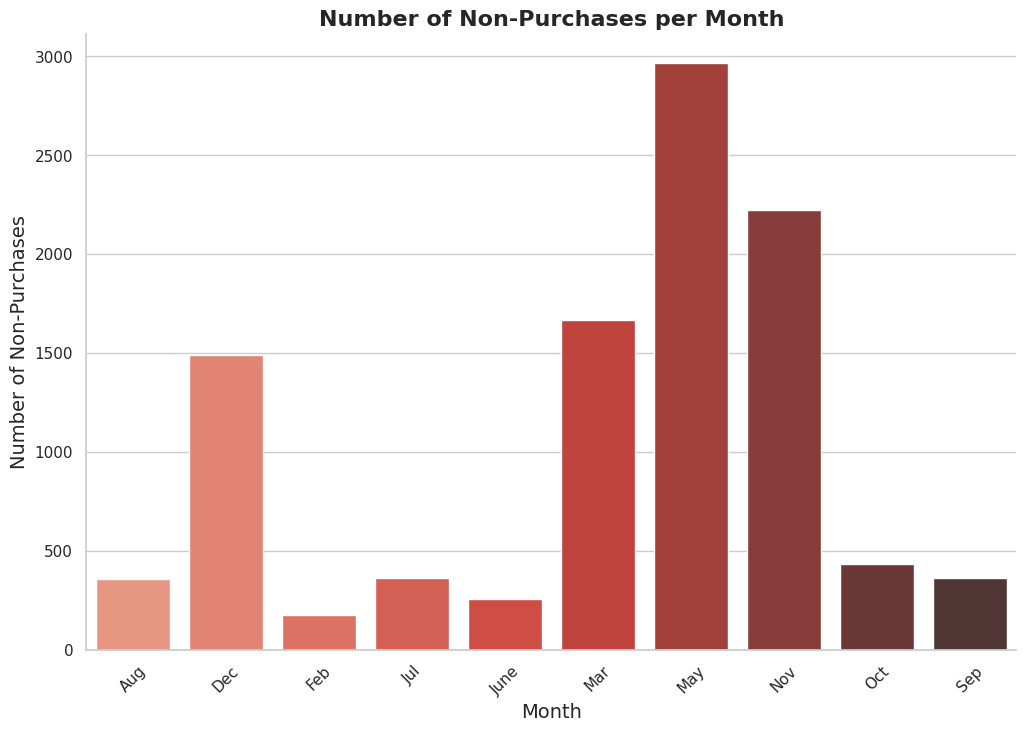

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Creating a plot to show the number of non-purchases (False in 'Revenue') for each month
# Calculating the number of non-purchases per month
non_purchases_per_month = data.groupby('Month')['Revenue'].apply(lambda x: (x == False).sum())

# Setting a more appealing style
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=non_purchases_per_month.index, y=non_purchases_per_month.values, palette="Reds_d")
plt.title('Number of Non-Purchases per Month', fontsize=16, fontweight='bold')
plt.ylabel('Number of Non-Purchases', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.xticks(rotation=45)
sns.despine()  # Removing the top and right spines for a cleaner look

# Displaying the plot
plt.show()

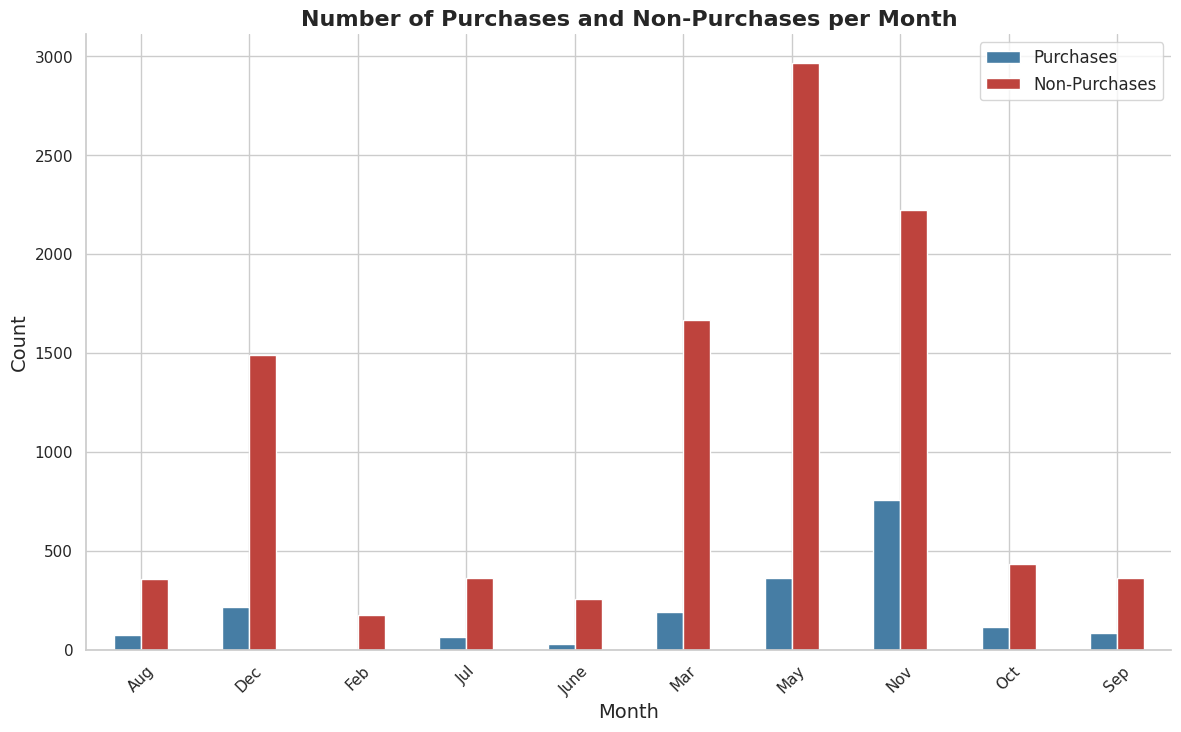

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculating the number of purchases and non-purchases per month
purchases_per_month = data.groupby('Month')['Revenue'].sum()  # Summing boolean values gives count of True (purchases)
non_purchases_per_month = data.groupby('Month')['Revenue'].apply(lambda x: (x == False).sum())  # Count of False

# Combining the data for plotting
combined_data = pd.DataFrame({'Purchases': purchases_per_month, 'Non-Purchases': non_purchases_per_month})

# Setting a more appealing style
sns.set(style="whitegrid")

# Creating the plot
fig, ax = plt.subplots(figsize=(14, 8))
combined_data.plot(kind='bar', ax=ax, color=['#467DA4', '#BE433D'])
plt.title('Number of Purchases and Non-Purchases per Month', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
sns.despine()

# Displaying the plot
plt.show()

# **Correlation Analysis**

<ipython-input-18-c31e2fa22921>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


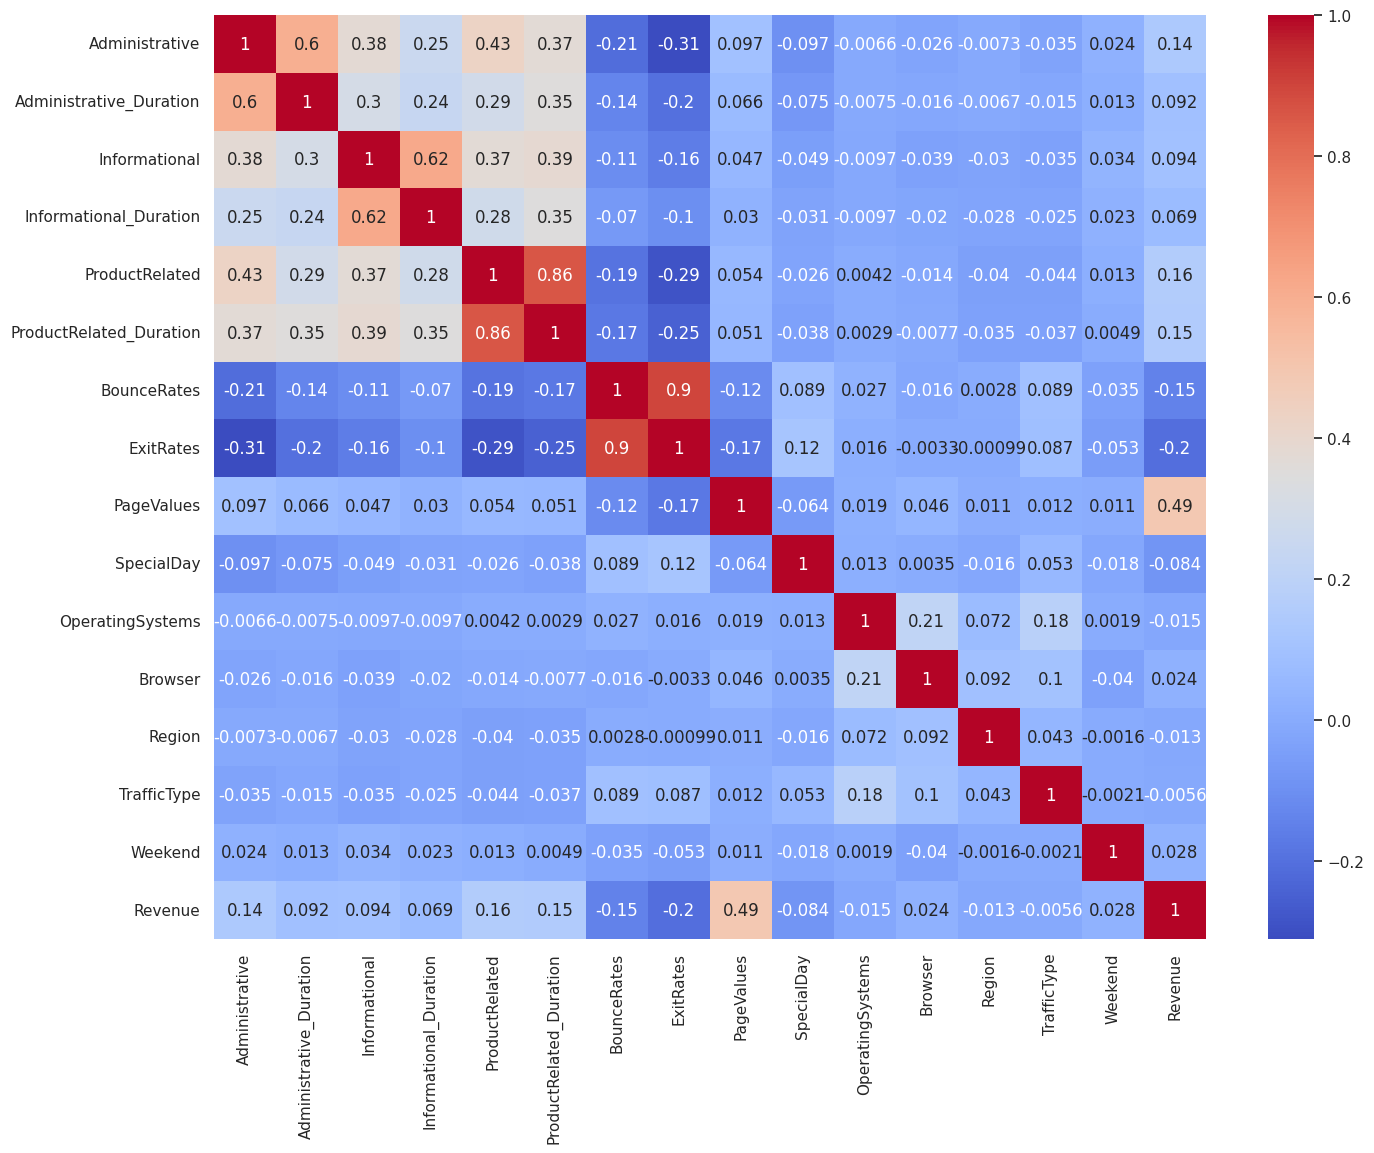

In [ ]:
# Correlation matrix
corr = data.corr()

# Heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


# Multivariate Analysis

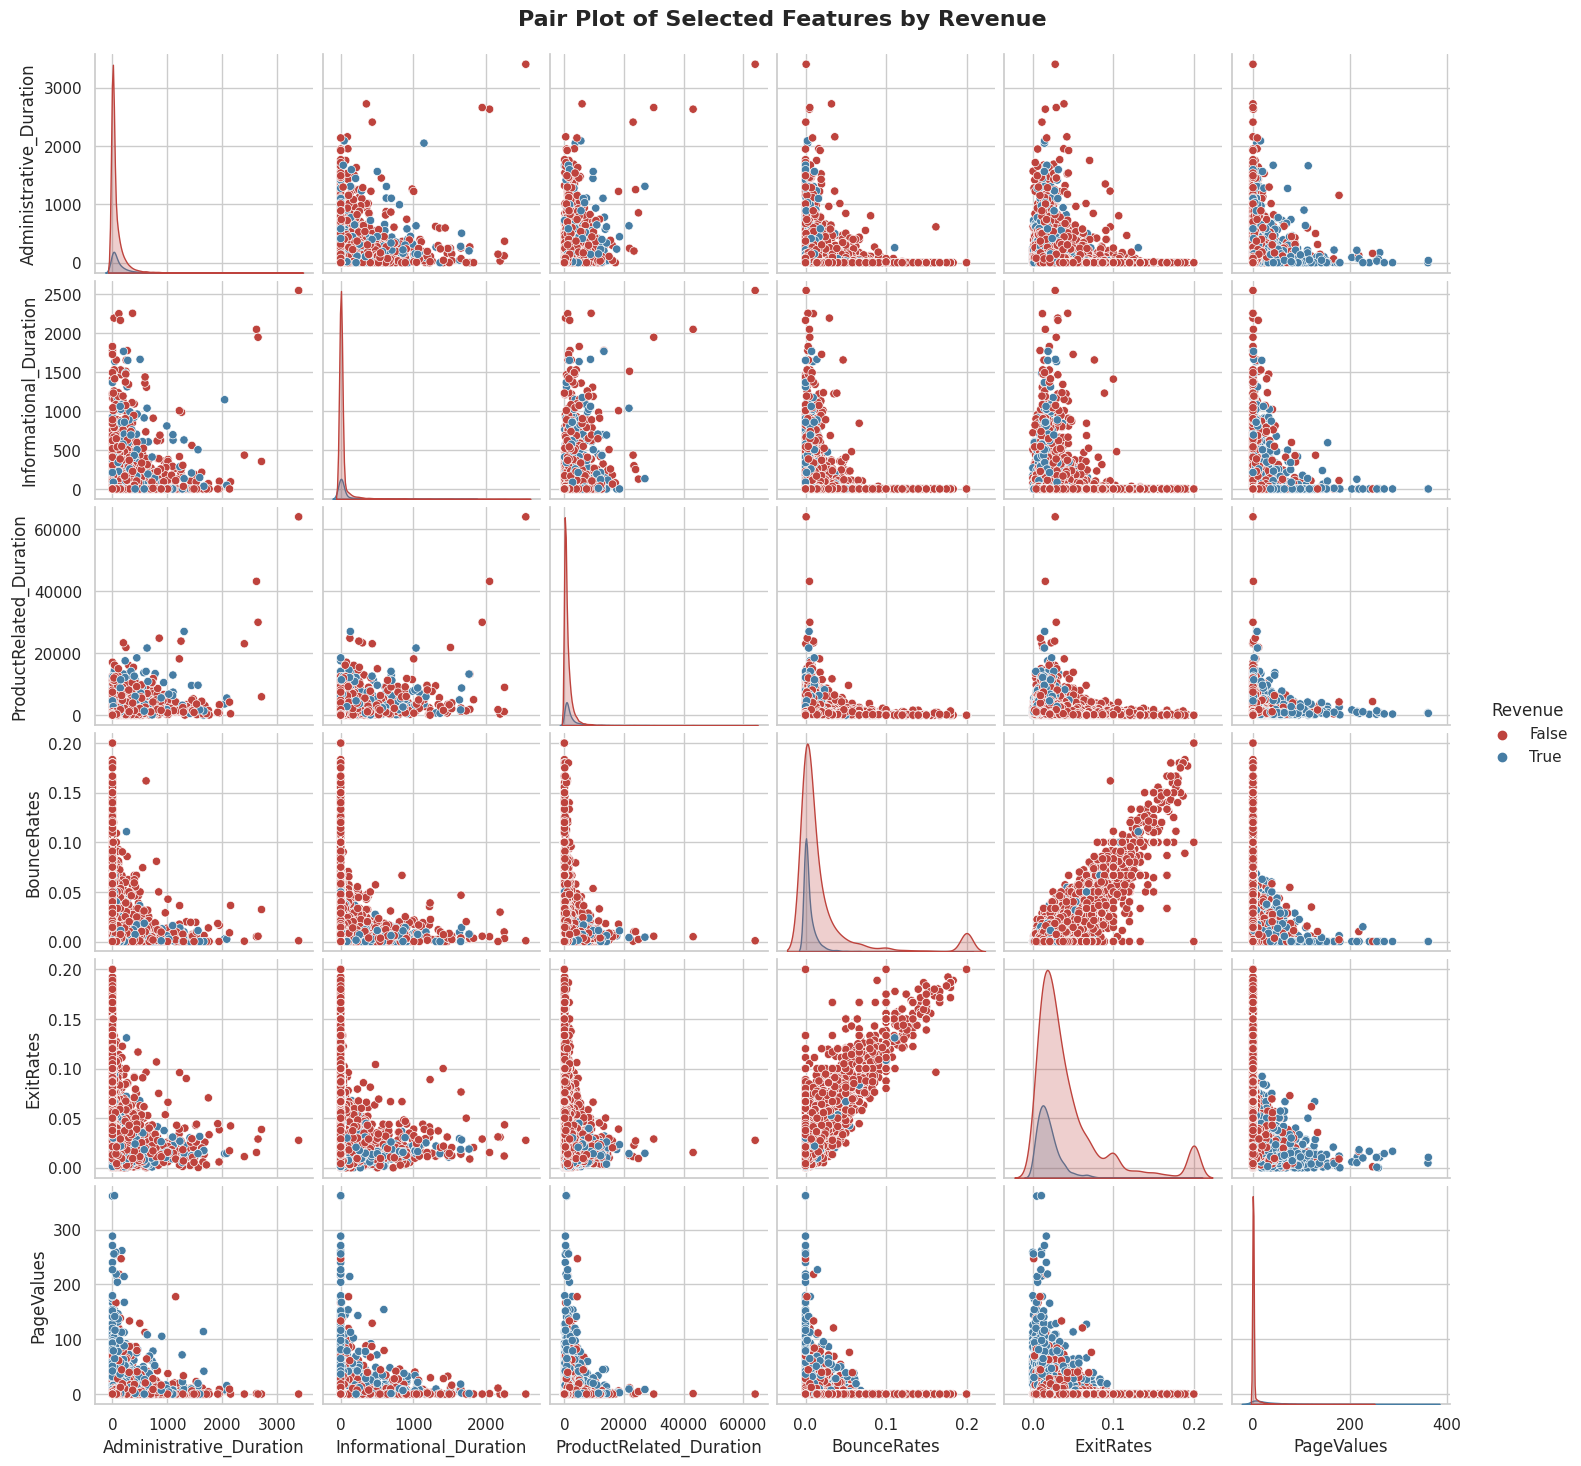

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Selecting a subset of numerical columns that might have meaningful relationships
# Also including 'Revenue' as a categorical variable for the hue
selected_numerical_cols = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
selected_cols_for_pairplot = selected_numerical_cols + ['Revenue']

# Setting a more appealing style
sns.set(style="whitegrid")

# Creating the pair plot with custom colors
# Using boolean True and False directly as keys for the palette
pairplot = sns.pairplot(data[selected_cols_for_pairplot], hue='Revenue', palette={True: '#467DA4', False: '#BE433D'})
pairplot.fig.suptitle('Pair Plot of Selected Features by Revenue', fontsize=16, fontweight='bold')
pairplot.fig.subplots_adjust(top=0.95)  # Adjusting the top of the plot for the title

# Displaying the plot
plt.show()



---


# **Feature Engineering**


---



In [ ]:
# Creating a new variable: 'Avg_Duration_Per_Visit'
# This represents the average time a user spends on each page they visit
data['Avg_Duration_Per_Visit'] = (data['Administrative_Duration'] + data['Informational_Duration'] + data['ProductRelated_Duration']) / (data['Administrative'] + data['Informational'] + data['ProductRelated'])
data['Avg_Duration_Per_Visit'].fillna(0, inplace=True)  # Handling division by zero

# Creating a new feature by combining BounceRates and ExitRates:'Bounce_Exit_Rate_Avg'
# Using a simple average for this combination
data['Bounce_Exit_Rate_Avg'] = (data['BounceRates'] + data['ExitRates']) / 2

# Display the first few rows of the dataset to show the new feature
data[['BounceRates', 'ExitRates', 'Bounce_Exit_Rate_Avg']].head()

# Displaying the first few rows with the new variable
data.head()


Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  \
0        1       1            1  Returning_Visitor    False    False   
1        2       1            2  Returning_Visitor    False    False   
2        1       9            3  Returning_Visitor    False    False   
3        2       2            4  Returning_Visitor    False    False   
4        3       1            4  Returning_Visitor     True    False   

   Avg_Duration_Per_Visit  Bounce_Exit_Rate_Avg  
0                0.000000                 0.200  
1               32.000000                 0.050  
2                0.000000                 0.200  
3                1.333333                 0.095  
4               62.750000                 0.035



---


# **Problem 1 (Regression)**


---



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Preparing the data with the new variable included
X = data.drop(['ProductRelated_Duration', 'Revenue'], axis=1)  # Exclude target and non-feature column
y = data['ProductRelated_Duration']

# Handling categorical variables via one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred = lin_reg.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE (Linear Regression):", mse)
print("R2 (Linear Regression):", r2)

MSE (Linear Regression): 1282530.0165796638
R2 (Linear Regression): 0.7201080508007809


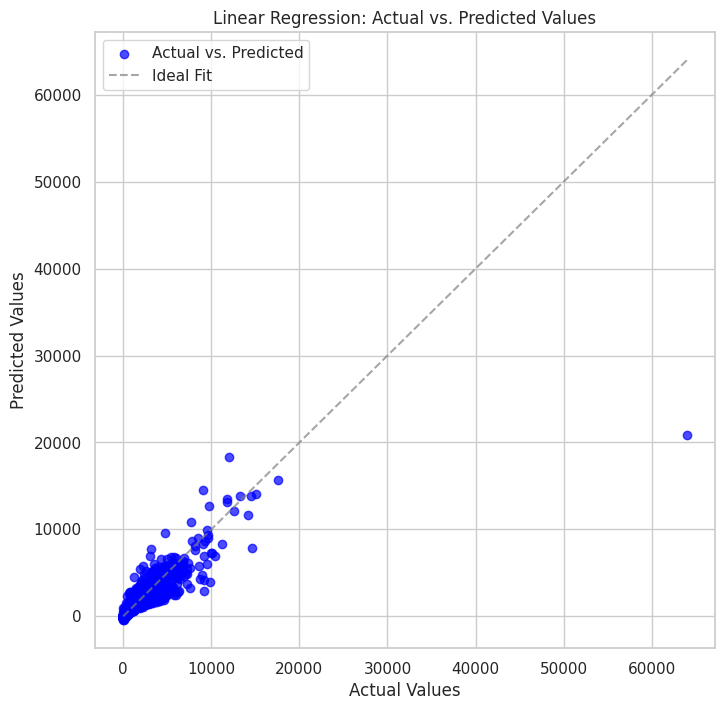

In [ ]:
import matplotlib.pyplot as plt

# Creating a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, c='blue', marker='o', label='Actual vs. Predicted', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Fit', alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialising the Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)

# Training the model using cross-validation
rf_cv_scores = cross_val_score(rf_reg, X_train, y_train, cv=10, scoring='r2')

# Average R2 score from cross-validation
average_r2_rf = np.mean(rf_cv_scores)

print("Average R2 Score (Random Forest):", average_r2_rf)


Average R2 Score (Random Forest): 0.9740173838000953


In [ ]:
# Training the Random Forest model on the entire training set
rf_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = rf_reg.predict(X_test)

# Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("MSE (Random Forest):", mse_rf)
print("R2 (Random Forest):", r2_rf)


MSE (Random Forest): 609383.4951122614
R2 (Random Forest): 0.8670116628446105


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for model stability and performance assessment
cv_r2_scores = cross_val_score(rf_reg, X_train, y_train, cv=10, scoring='r2')
cv_r2_mean = np.mean(cv_r2_scores)

print("Cross-Validated R2 Score:", cv_r2_mean)


Cross-Validated R2 Score: 0.9740173838000953


## **Feature Importance**

In [ ]:
# Training the model on the entire training data
rf_reg.fit(X_train, y_train)

# Feature importance
feature_importances = rf_reg.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sorting features by importance
sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)

print(sorted_feature_importance.head(10))  # Displaying top 10 important features


                    Feature  Importance
4            ProductRelated    0.773804
14   Avg_Duration_Per_Visit    0.182657
1   Administrative_Duration    0.024162
3    Informational_Duration    0.004840
2             Informational    0.003233
12              TrafficType    0.002168
0            Administrative    0.001674
6                 ExitRates    0.001066
13                  Weekend    0.000988
21                Month_May    0.000986


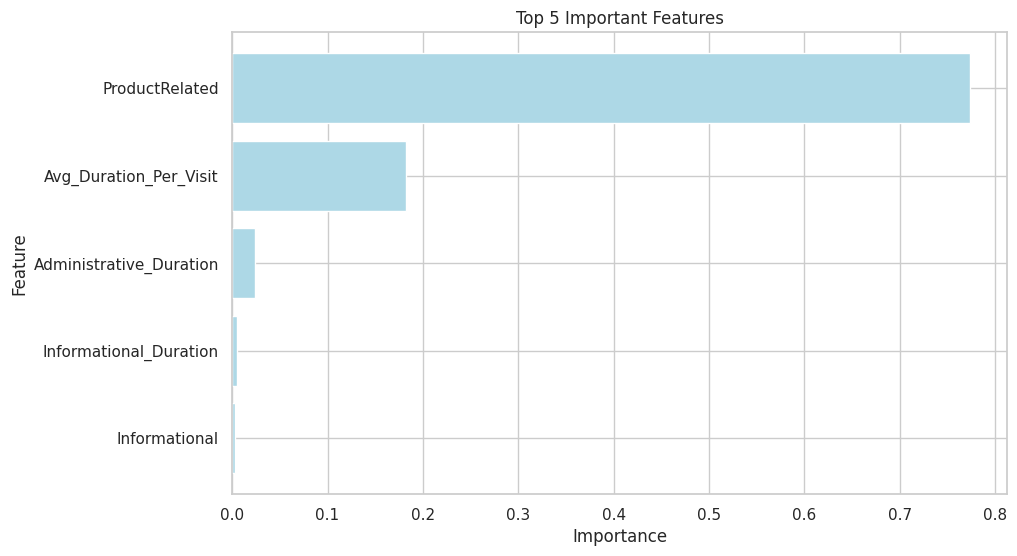

In [ ]:
import matplotlib.pyplot as plt

# Get the top N important features
top_n = 5  # You can change this number to display more or fewer features
top_features = sorted_feature_importance.head(top_n)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='lightblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Important Features')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.show()


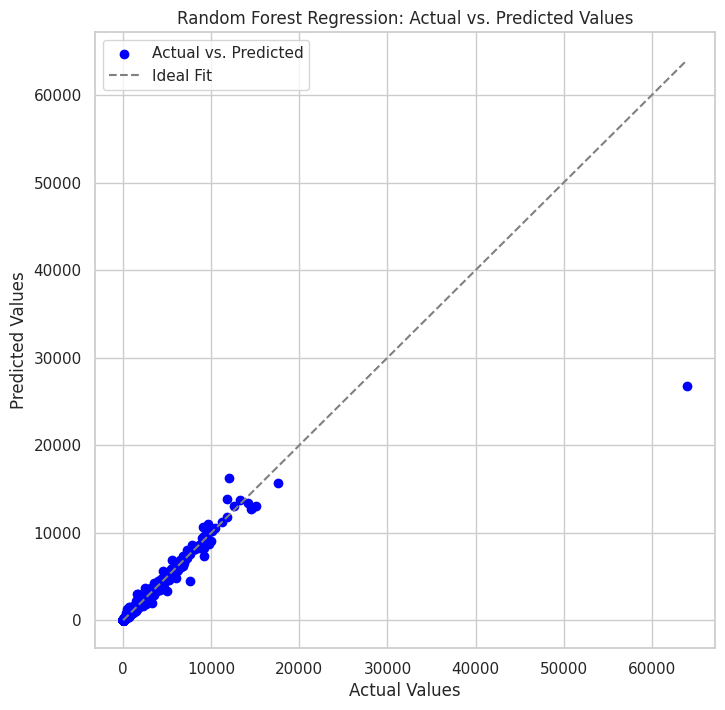

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_rf, c='blue', marker='o', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression: Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()




---



# **Problem 2 (Classification)**



---



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
import numpy as np


# Separating the target variable and features
X = data.drop('Revenue', axis=1)
y = data['Revenue']

# Identifying numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display missing values information and the columns identified for preprocessing
numerical_cols.tolist(), categorical_cols.tolist()


(['Administrative',
  'Administrative_Duration',
  'Informational',
  'Informational_Duration',
  'ProductRelated',
  'ProductRelated_Duration',
  'BounceRates',
  'ExitRates',
  'PageValues',
  'SpecialDay',
  'OperatingSystems',
  'Browser',
  'Region',
  'TrafficType',
  'Avg_Duration_Per_Visit',
  'Bounce_Exit_Rate_Avg'],
 ['Month', 'VisitorType', 'Weekend'])

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report


# Creating the preprocessing and training pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Cross-validation on the training set
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

# Training the logistic regression model on the training set
pipeline.fit(X_train, y_train)

# Predicting on the test set
y_pred = pipeline.predict(X_test)

# Confusion Matrix and Classification Report on the test set
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Printing the results
print("Cross-Validation Metrics on Training Set:")
print(f"CV Accuracy: {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}")
print("\nConfusion Matrix on Test Set:")
print(conf_matrix)
print("\nClassification Report on Test Set:")
print(class_report)


Cross-Validation Metrics on Training Set:
CV Accuracy: 0.88 ± 0.01

Confusion Matrix on Test Set:
[[3044   72]
 [ 330  216]]

Classification Report on Test Set:
              precision    recall  f1-score   support

       False       0.90      0.98      0.94      3116
        True       0.75      0.40      0.52       546

    accuracy                           0.89      3662
   macro avg       0.83      0.69      0.73      3662
weighted avg       0.88      0.89      0.88      3662



## **SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline  # Import from imblearn to correctly integrate SMOTE

# Creating the preprocessing and training pipeline with SMOTE
pipeline_smote = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Cross-validation on the training set (after SMOTE)
cv_scores_smote = cross_val_score(pipeline_smote, X_train, y_train, cv=5, scoring='accuracy')

# Training the logistic regression model on the training set with SMOTE
pipeline_smote.fit(X_train, y_train)

# Predicting on the test set
y_pred_smote = pipeline_smote.predict(X_test)

# Confusion Matrix and Classification Report on the test set
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
class_report_smote = classification_report(y_test, y_pred_smote)

# Printing the results
print("Cross-Validation Metrics on Training Set (with SMOTE):")
print(f"CV Accuracy: {np.mean(cv_scores_smote):.2f} ± {np.std(cv_scores_smote):.2f}")
print("\nConfusion Matrix on Test Set (with SMOTE):")
print(conf_matrix_smote)
print("\nClassification Report on Test Set (with SMOTE):")
print(class_report_smote)


Cross-Validation Metrics on Training Set (with SMOTE):
CV Accuracy: 0.85 ± 0.01

Confusion Matrix on Test Set (with SMOTE):
[[2726  390]
 [ 135  411]]

Classification Report on Test Set (with SMOTE):
              precision    recall  f1-score   support

       False       0.95      0.87      0.91      3116
        True       0.51      0.75      0.61       546

    accuracy                           0.86      3662
   macro avg       0.73      0.81      0.76      3662
weighted avg       0.89      0.86      0.87      3662



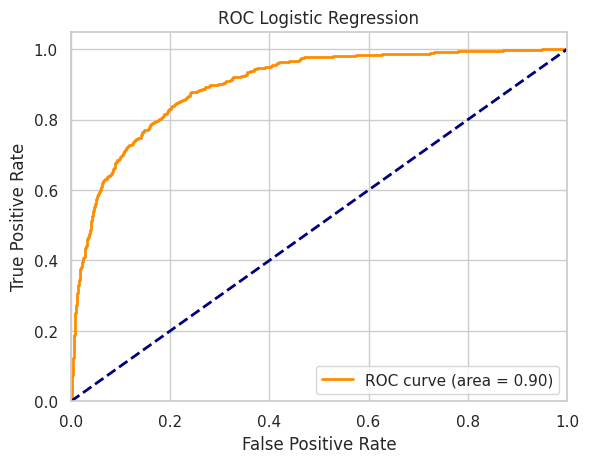

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predicting probabilities
probabilities = pipeline.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculating ROC Curve and ROC AUC
fpr, tpr, _ = roc_curve(y_test, probabilities)
roc_auc = roc_auc_score(y_test, probabilities)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Logistic Regression')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

# Creating the preprocessing and training pipeline with SMOTE and Random Forest
pipeline_rf_smote = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Cross-validation on the training set with SMOTE
cv_scores_rf_smote = cross_val_score(pipeline_rf_smote, X_train, y_train, cv=5, scoring='accuracy')

# Training the Random Forest model on the training set with SMOTE
pipeline_rf_smote.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf_smote = pipeline_rf_smote.predict(X_test)

# Confusion Matrix and Classification Report on the test set with SMOTE
conf_matrix_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)
class_report_rf_smote = classification_report(y_test, y_pred_rf_smote)

# Printing the results
print("Cross-Validation Metrics on Training Set with SMOTE (Random Forest):")
print(f"CV Accuracy: {np.mean(cv_scores_rf_smote):.2f} ± {np.std(cv_scores_rf_smote):.2f}")
print("\nConfusion Matrix on Test Set with SMOTE (Random Forest):")
print(conf_matrix_rf_smote)
print("\nClassification Report on Test Set with SMOTE (Random Forest):")
print(class_report_rf_smote)


Cross-Validation Metrics on Training Set with SMOTE (Random Forest):
CV Accuracy: 0.89 ± 0.01

Confusion Matrix on Test Set with SMOTE (Random Forest):
[[2890  226]
 [ 156  390]]

Classification Report on Test Set with SMOTE (Random Forest):
              precision    recall  f1-score   support

       False       0.95      0.93      0.94      3116
        True       0.63      0.71      0.67       546

    accuracy                           0.90      3662
   macro avg       0.79      0.82      0.80      3662
weighted avg       0.90      0.90      0.90      3662



## Feature Importance

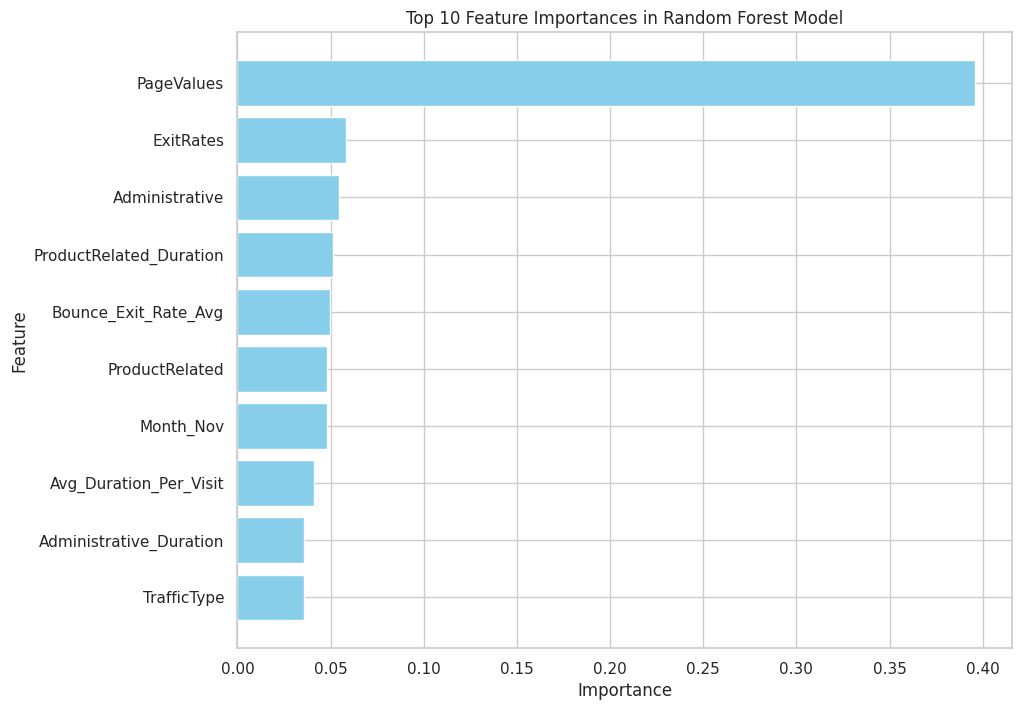

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature importances from the Random Forest model
feature_importances = pipeline_rf_smote.named_steps['classifier'].feature_importances_

# Creating a DataFrame to display feature importances
features = numerical_cols.tolist() + list(pipeline_rf_smote.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols))
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances in Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

# List of classifiers to apply
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVC": SVC(probability=True, random_state=42),  # probability=True for ROC/AUC
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGB Boost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Applying each classifier
for name, classifier in classifiers.items():
    # Creating the preprocessing and training pipeline with SMOTE and the current classifier
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', classifier)
    ])

    # Cross-validation on the training set with SMOTE
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='accuracy')

    # Training the model on the training set with SMOTE
    pipeline.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = pipeline.predict(X_test)

    # Confusion Matrix and Classification Report on the test set
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Printing the results
    print(f"{name} - Cross-Validation Metrics on Training Set with SMOTE:")
    print(f"CV Accuracy: {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}")
    print("\nConfusion Matrix on Test Set:")
    print(conf_matrix)
    print("\nClassification Report on Test Set:")
    print(class_report)
    print("------------------------------------------------------\n")


Logistic Regression - Cross-Validation Metrics on Training Set with SMOTE:
CV Accuracy: 0.85 ± 0.02

Confusion Matrix on Test Set:
[[2726  390]
 [ 135  411]]

Classification Report on Test Set:
              precision    recall  f1-score   support

       False       0.95      0.87      0.91      3116
        True       0.51      0.75      0.61       546

    accuracy                           0.86      3662
   macro avg       0.73      0.81      0.76      3662
weighted avg       0.89      0.86      0.87      3662

------------------------------------------------------

Decision Tree - Cross-Validation Metrics on Training Set with SMOTE:
CV Accuracy: 0.85 ± 0.01

Confusion Matrix on Test Set:
[[2790  326]
 [ 217  329]]

Classification Report on Test Set:
              precision    recall  f1-score   support

       False       0.93      0.90      0.91      3116
        True       0.50      0.60      0.55       546

    accuracy                           0.85      3662
   macro avg     

## Confusion Matrices (Before Tuning)

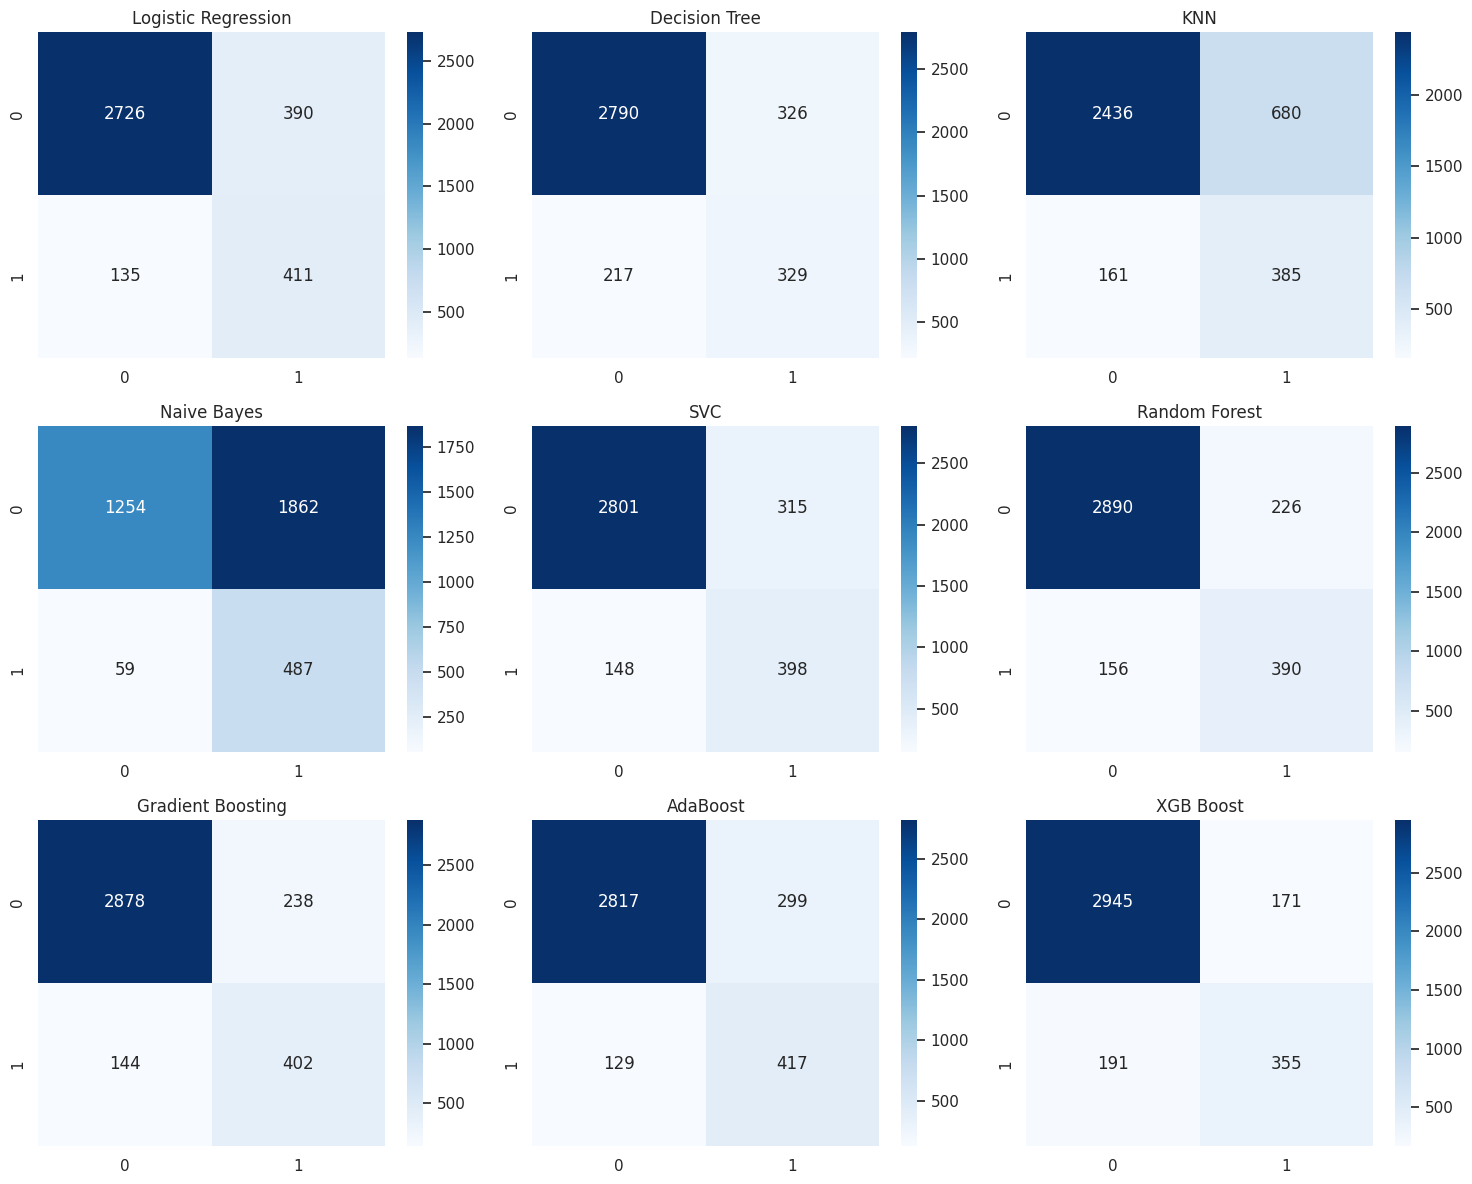

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Setting up the matplotlib figure
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Flatten the axes array for easy iterating
axes = axes.flatten()

for i, (name, classifier) in enumerate(classifiers.items()):
    # Creating the pipeline with SMOTE and the current classifier
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', classifier)
    ])

    # Train the model on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate confusion matrix
    matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix in a subplot
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=axes[i])

    # Title with the classifier name
    axes[i].title.set_text(name)

# Adjust the layout
plt.tight_layout()
plt.show()


## ROC Curve and AUC

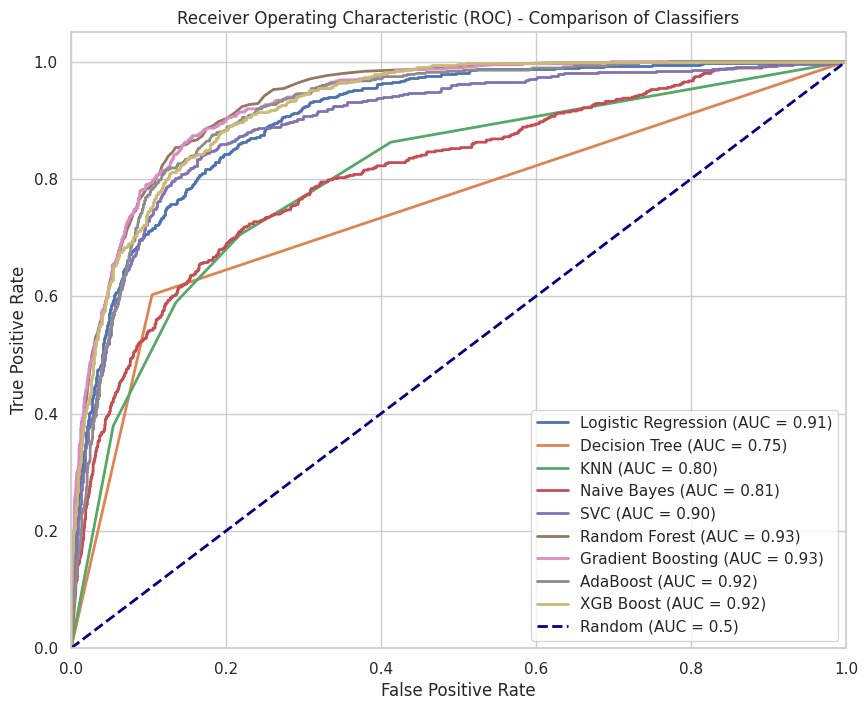

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialise plot
plt.figure(figsize=(10, 8))

# Calculate and plot ROC AUC for each classifier
for name, classifier in classifiers.items():
    # Create pipeline with SMOTE and the current classifier
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', classifier)
    ])

    # Train the model on the training set
    pipeline.fit(X_train, y_train)

    # Predict probabilities on the test set
    if name == "SVC":  # Checking if the classifier is SVC
        probabilities = pipeline.decision_function(X_test)
        # For SVC, I need to use decision_function rather than predict_proba
        fpr, tpr, _ = roc_curve(y_test, probabilities)
    else:
        # For other classifiers
        probabilities = pipeline.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, probabilities)

    # Calculate the AUC
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the random line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random (AUC = 0.5)')

# Customising the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Comparison of Classifiers')
plt.legend(loc="lower right")

# Show the plot
plt.show()


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Define base learners
estimators = [
    #('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    #('AdaBoost', AdaBoostClassifier(n_estimators=100, random_state=42)),
    ('XGBoost', XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Define the stacking ensemble
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)

# Create a pipeline with preprocessing, SMOTE, and the stacking classifier
stacking_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('stacking', stacking_clf)
])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the stacking model
stacking_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_stack = stacking_pipeline.predict(X_test)

# Calculate the confusion matrix and classification report
conf_matrix_stack = confusion_matrix(y_test, y_pred_stack)
class_report_stack = classification_report(y_test, y_pred_stack)

# Print the results
print("Confusion Matrix for Stacked Model:")
print(conf_matrix_stack)
print("\nClassification Report for Stacked Model:")
print(class_report_stack)


Confusion Matrix for Stacked Model:
[[2887  229]
 [ 155  391]]

Classification Report for Stacked Model:
              precision    recall  f1-score   support

       False       0.95      0.93      0.94      3116
        True       0.63      0.72      0.67       546

    accuracy                           0.90      3662
   macro avg       0.79      0.82      0.80      3662
weighted avg       0.90      0.90      0.90      3662



In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Define the base learners
classifiers = [
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=100, random_state=42)),
    ('XGBoost', XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Define the voting ensemble
voting_clf = VotingClassifier(estimators=classifiers, voting='hard')

# Create a pipeline with preprocessing, SMOTE, and the voting classifier
voting_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('voting', voting_clf)
])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the voting model
voting_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_vote = voting_pipeline.predict(X_test)

# Calculate the confusion matrix and classification report
conf_matrix_vote = confusion_matrix(y_test, y_pred_vote)
class_report_vote = classification_report(y_test, y_pred_vote)

# Print the results
print("Confusion Matrix for Voting Model:")
print(conf_matrix_vote)
print("\nClassification Report for Voting Model:")
print(class_report_vote)


Confusion Matrix for Voting Model:
[[2920  196]
 [ 168  378]]

Classification Report for Voting Model:
              precision    recall  f1-score   support

       False       0.95      0.94      0.94      3116
        True       0.66      0.69      0.68       546

    accuracy                           0.90      3662
   macro avg       0.80      0.81      0.81      3662
weighted avg       0.90      0.90      0.90      3662





---

## **Hyperparameters For Each Model**

---



Best hyperparameters for Decision Tree:
{'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10}
Best cross-validation score: 0.87

Classification Report for Best Decision Tree Model:
              precision    recall  f1-score   support

       False       0.95      0.89      0.92      3116
        True       0.54      0.71      0.61       546

    accuracy                           0.87      3662
   macro avg       0.74      0.80      0.77      3662
weighted avg       0.89      0.87      0.87      3662



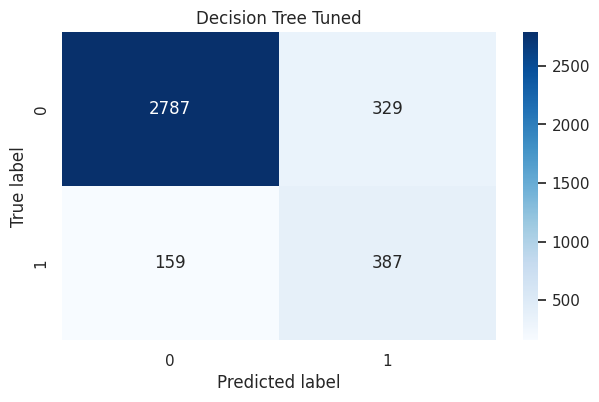

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

# Hyperparameter grid for Decision Tree
param_grid_dt = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create the pipeline with a Decision Tree classifier
pipeline_dt = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(pipeline_dt, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Best hyperparameters and score for Decision Tree
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print("Best hyperparameters for Decision Tree:")
print(best_params_dt)
print(f"Best cross-validation score: {best_score_dt:.2f}")

# Predict on the test set using the best model
y_pred_dt = grid_search_dt.predict(X_test)

# Confusion Matrix and Classification Report on the test set
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

print("\nClassification Report for Best Decision Tree Model:")
print(class_report_dt)

# Plotting the confusion matrix
plt.figure(figsize=(7, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Tuned')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


Best hyperparameters for KNN:
{'classifier__algorithm': 'auto', 'classifier__leaf_size': 20, 'classifier__n_neighbors': 10, 'classifier__weights': 'uniform'}
Best cross-validation score: 0.77

Classification Report for Best KNN Model:
              precision    recall  f1-score   support

       False       0.94      0.79      0.86      3116
        True       0.37      0.72      0.49       546

    accuracy                           0.78      3662
   macro avg       0.66      0.75      0.67      3662
weighted avg       0.86      0.78      0.80      3662



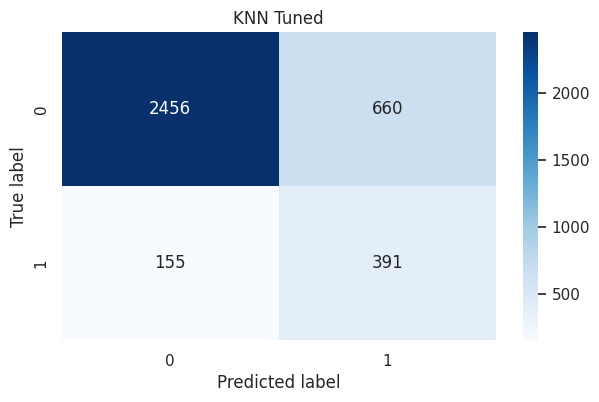

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Hyperparameter grid for KNN
param_grid_knn = {
    'classifier__n_neighbors': [5, 10, 15],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'classifier__leaf_size': [20, 30, 40]
}

# Create the pipeline with a KNN classifier
pipeline_knn = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier())
])

# GridSearchCV for KNN
grid_search_knn = GridSearchCV(pipeline_knn, param_grid=param_grid_knn, cv=3, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search_knn.fit(X_train, y_train)

# Best hyperparameters and score for KNN
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print("Best hyperparameters for KNN:")
print(best_params_knn)
print(f"Best cross-validation score: {best_score_knn:.2f}")

# Predict on the test set using the best model
y_pred_knn = grid_search_knn.predict(X_test)

# Confusion Matrix and Classification Report on the test set
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

print("\nClassification Report for Best KNN Model:")
print(class_report_knn)

# Plotting the confusion matrix
plt.figure(figsize=(7, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Tuned')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



Best hyperparameters for Gaussian Naive Bayes:
{'classifier__var_smoothing': 1e-07}
Best cross-validation score: 0.47

Classification Report for Best Naive Bayes Model:
              precision    recall  f1-score   support

       False       0.96      0.40      0.57      3116
        True       0.21      0.89      0.34       546

    accuracy                           0.48      3662
   macro avg       0.58      0.65      0.45      3662
weighted avg       0.84      0.48      0.53      3662



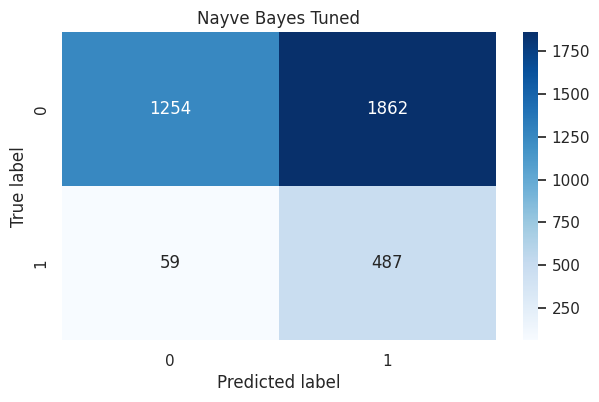

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Hyperparameters for Naive Bayes
param_grid_nb = {
    'classifier__var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Create the pipeline with a GaussianNB classifier
pipeline_nb = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', GaussianNB())
])

# GridSearchCV for Naive Bayes
grid_search_nb = GridSearchCV(pipeline_nb, param_grid=param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search_nb.fit(X_train, y_train)

# Best hyperparameters and score for Naive Bayes
best_params_nb = grid_search_nb.best_params_
best_score_nb = grid_search_nb.best_score_

print("Best hyperparameters for Gaussian Naive Bayes:")
print(best_params_nb)
print(f"Best cross-validation score: {best_score_nb:.2f}")

# Predict on the test set using the best model
y_pred_nb = grid_search_nb.predict(X_test)

# Confusion Matrix and Classification Report on the test set
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb)

print("\nClassification Report for Best Naive Bayes Model:")
print(class_report_nb)

# Plotting the confusion matrix
plt.figure(figsize=(7, 4))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Nayve Bayes Tuned')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Best hyperparameters for SVC:
{'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best cross-validation score: 0.88

Classification Report for Best SVC Model:
              precision    recall  f1-score   support

       False       0.95      0.90      0.93      3116
        True       0.56      0.75      0.65       546

    accuracy                           0.88      3662
   macro avg       0.76      0.83      0.79      3662
weighted avg       0.90      0.88      0.88      3662



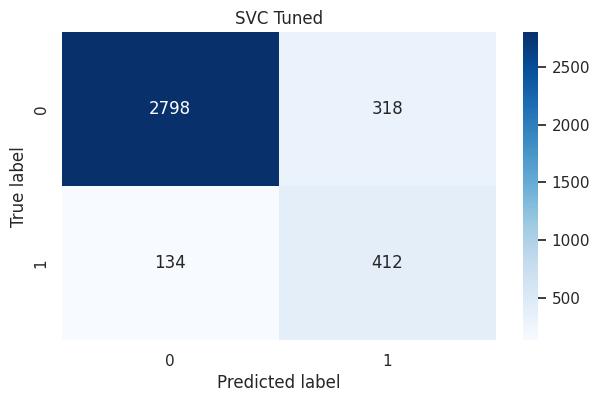

In [ ]:

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for SVC
param_grid_svc = {
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': ['scale', 'auto'],
    'classifier__kernel': ['linear', 'rbf']
}

# Create the pipeline with an SVC classifier
pipeline_svc = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC(random_state=42, probability=True))  # probability=True to enable predict_proba
])

# GridSearchCV for SVC
grid_search_svc = GridSearchCV(pipeline_svc, param_grid=param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search_svc.fit(X_train, y_train)

# Best hyperparameters and score for SVC
best_params_svc = grid_search_svc.best_params_
best_score_svc = grid_search_svc.best_score_

print("Best hyperparameters for SVC:")
print(best_params_svc)
print(f"Best cross-validation score: {best_score_svc:.2f}")

# Predict on the test set using the best model
y_pred_svc = grid_search_svc.predict(X_test)

# Confusion Matrix and Classification Report on the test set
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
class_report_svc = classification_report(y_test, y_pred_svc)

print("\nClassification Report for Best SVC Model:")
print(class_report_svc)

# Plotting the confusion matrix
plt.figure(figsize=(7, 4))
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues')
plt.title('SVC Tuned')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



Best hyperparameters for RandomForestClassifier:
{'classifier__max_depth': 30, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best cross-validation score: 0.90

Classification Report for Best RandomForestClassifier Model:
              precision    recall  f1-score   support

       False       0.95      0.93      0.94      3116
        True       0.63      0.71      0.66       546

    accuracy                           0.89      3662
   macro avg       0.79      0.82      0.80      3662
weighted avg       0.90      0.89      0.90      3662



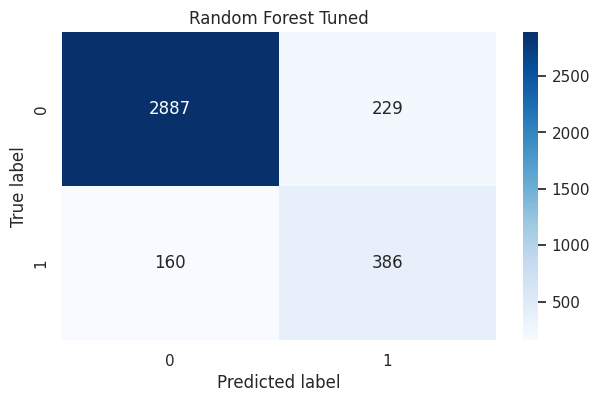

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for RandomForestClassifier
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create a pipeline with preprocessing, SMOTE, and RandomForestClassifier
pipeline_rf = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# GridSearchCV
grid_search_rf = GridSearchCV(pipeline_rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Best hyperparameters
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best hyperparameters for RandomForestClassifier:")
print(best_params_rf)
print(f"Best cross-validation score: {best_score_rf:.2f}")

# Predict on the test set using the best model
y_pred_rf = grid_search_rf.predict(X_test)

# Confusion Matrix and Classification Report on the test set
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("\nClassification Report for Best RandomForestClassifier Model:")
print(class_report_rf)

# Plotting the confusion matrix
plt.figure(figsize=(7, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Tuned')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


Best hyperparameters for GradientBoostingClassifier:
{'classifier__learning_rate': 0.1, 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 4, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}
Best cross-validation score: 0.90

Classification Report for Best GradientBoostingClassifier Model:
              precision    recall  f1-score   support

       False       0.94      0.94      0.94      3116
        True       0.66      0.66      0.66       546

    accuracy                           0.90      3662
   macro avg       0.80      0.80      0.80      3662
weighted avg       0.90      0.90      0.90      3662



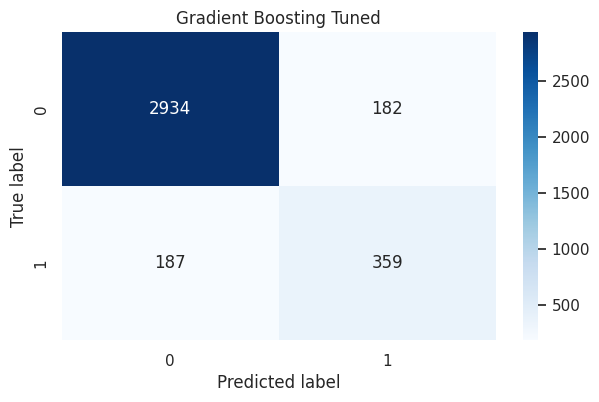

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for GradientBoostingClassifier
param_grid_gb = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 10],
    'classifier__subsample': [0.8, 1.0],  # The fraction of samples to be used for fitting the individual base learners.
    'classifier__min_samples_split': [2, 4],  # Minimum number of samples required to split a node.
    'classifier__min_samples_leaf': [1, 2]  # Minimum number of samples required to be at a leaf node.
}

# Create the pipeline with a GradientBoostingClassifier
pipeline_gb = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# GridSearchCV for GradientBoostingClassifier
grid_search_gb = GridSearchCV(pipeline_gb, param_grid=param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search_gb.fit(X_train, y_train)

# Best hyperparameters and score for GradientBoostingClassifier
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

print("Best hyperparameters for GradientBoostingClassifier:")
print(best_params_gb)
print(f"Best cross-validation score: {best_score_gb:.2f}")

# Predict on the test set using the best model
y_pred_gb = grid_search_gb.predict(X_test)

# Confusion Matrix and Classification Report on the test set
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

print("\nClassification Report for Best GradientBoostingClassifier Model:")
print(class_report_gb)

# Plotting the confusion matrix
plt.figure(figsize=(7, 4))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Tuned')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


Best hyperparameters for AdaBoostClassifier:
{'classifier__learning_rate': 1, 'classifier__n_estimators': 200}
Best cross-validation score: 0.89

Classification Report for Best AdaBoostClassifier Model:
              precision    recall  f1-score   support

       False       0.94      0.93      0.93      3116
        True       0.62      0.69      0.65       546

    accuracy                           0.89      3662
   macro avg       0.78      0.81      0.79      3662
weighted avg       0.90      0.89      0.89      3662



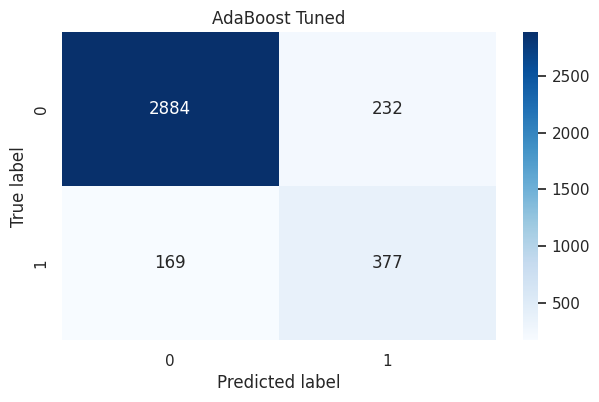

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for AdaBoostClassifier
param_grid_ab = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 1]
}

# Create the pipeline with an AdaBoostClassifier
pipeline_ab = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', AdaBoostClassifier(random_state=42))
])

# GridSearchCV for AdaBoostClassifier
grid_search_ab = GridSearchCV(pipeline_ab, param_grid=param_grid_ab, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search_ab.fit(X_train, y_train)

# Best hyperparameters and score for AdaBoostClassifier
best_params_ab = grid_search_ab.best_params_
best_score_ab = grid_search_ab.best_score_

print("Best hyperparameters for AdaBoostClassifier:")
print(best_params_ab)
print(f"Best cross-validation score: {best_score_ab:.2f}")

# Predict on the test set using the best model
y_pred_ab = grid_search_ab.predict(X_test)

# Confusion Matrix and Classification Report on the test set
conf_matrix_ab = confusion_matrix(y_test, y_pred_ab)
class_report_ab = classification_report(y_test, y_pred_ab)

print("\nClassification Report for Best AdaBoostClassifier Model:")
print(class_report_ab)

# Plotting the confusion matrix
plt.figure(figsize=(7, 4))
sns.heatmap(conf_matrix_ab, annot=True, fmt='d', cmap='Blues')
plt.title('AdaBoost Tuned')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



Best hyperparameters for XGBClassifier:
{'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__min_child_weight': 2, 'classifier__n_estimators': 200, 'classifier__subsample': 1}
Best cross-validation score: 0.90

Classification Report for Best XGBClassifier Model:
              precision    recall  f1-score   support

       False       0.95      0.93      0.94      3116
        True       0.65      0.71      0.68       546

    accuracy                           0.90      3662
   macro avg       0.80      0.82      0.81      3662
weighted avg       0.90      0.90      0.90      3662



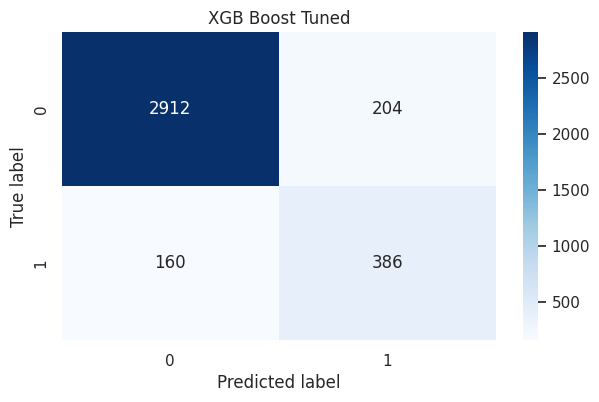

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for XGBClassifier
param_grid_xgb = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 1],
    'classifier__colsample_bytree': [0.8, 1],
    'classifier__min_child_weight': [1, 2, 3]
}

# Create the pipeline with an XGBClassifier
pipeline_xgb = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# GridSearchCV for XGBClassifier
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search_xgb.fit(X_train, y_train)

# Best hyperparameters and score for XGBClassifier
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print("Best hyperparameters for XGBClassifier:")
print(best_params_xgb)
print(f"Best cross-validation score: {best_score_xgb:.2f}")

# Predict on the test set using the best model
y_pred_xgb = grid_search_xgb.predict(X_test)

# Confusion Matrix and Classification Report on the test set
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

print("\nClassification Report for Best XGBClassifier Model:")
print(class_report_xgb)

# Plotting the confusion matrix
plt.figure(figsize=(7, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGB Boost Tuned')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


Confusion Matrix for Stacked Model:
[[2932  184]
 [ 189  357]]

Classification Report for Stacked Model:
              precision    recall  f1-score   support

       False       0.94      0.94      0.94      3116
        True       0.66      0.65      0.66       546

    accuracy                           0.90      3662
   macro avg       0.80      0.80      0.80      3662
weighted avg       0.90      0.90      0.90      3662



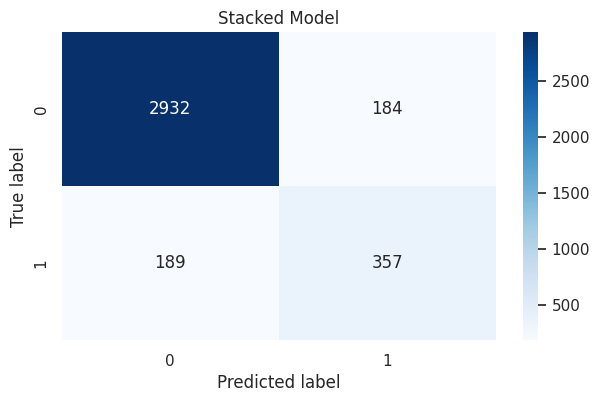

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Defining the best hyperparameters for each classifier as found in previous GridSearchCV results

best_params_svc = {
    'C': 0.1,
    'gamma': 'scale',
    'kernel': 'linear'
}

best_params_rf = {
    'max_depth': 30,
    'min_samples_leaf': 1,
    'min_samples_split': 5,
    'n_estimators': 200
}

best_params_gb = {
    'learning_rate': 0.1,
    'max_depth': 10,
    'min_samples_leaf': 1,
    'min_samples_split': 4,
    'n_estimators': 200,
    'subsample': 0.8
}

best_params_ab = {
    'learning_rate': 1,
    'n_estimators': 200
}

best_params_xgb = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_child_weight': 2,
    'n_estimators': 200,
    'subsample': 1
}

# Base estimators for stacking
base_estimators = [
    ('svc', SVC(**best_params_svc, probability=True)),
    ('rf', RandomForestClassifier(**best_params_rf)),
    ('gb', GradientBoostingClassifier(**best_params_gb)),
    ('ab', AdaBoostClassifier(**best_params_ab)),
    ('xgb', XGBClassifier(**best_params_xgb, use_label_encoder=False, eval_metric='logloss'))
]

# Define the stacking ensemble
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression(), cv=10)

# Create a pipeline with preprocessing, SMOTE, and the stacking classifier
stacking_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('stacking', stacking_clf)
])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the stacking model
stacking_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_stack = stacking_pipeline.predict(X_test)

# Calculate the confusion matrix and classification report
conf_matrix_stack = confusion_matrix(y_test, y_pred_stack)
class_report_stack = classification_report(y_test, y_pred_stack)

# Print the results
print("Confusion Matrix for Stacked Model:")
print(conf_matrix_stack)
print("\nClassification Report for Stacked Model:")
print(class_report_stack)

# Plotting the confusion matrix
plt.figure(figsize=(7, 4))
sns.heatmap(conf_matrix_stack, annot=True, fmt='d', cmap='Blues')
plt.title('Stacked Model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


Confusion Matrix for Voting Model:
[[2892  224]
 [ 159  387]]

Classification Report for Voting Model:
              precision    recall  f1-score   support

       False       0.95      0.93      0.94      3116
        True       0.63      0.71      0.67       546

    accuracy                           0.90      3662
   macro avg       0.79      0.82      0.80      3662
weighted avg       0.90      0.90      0.90      3662



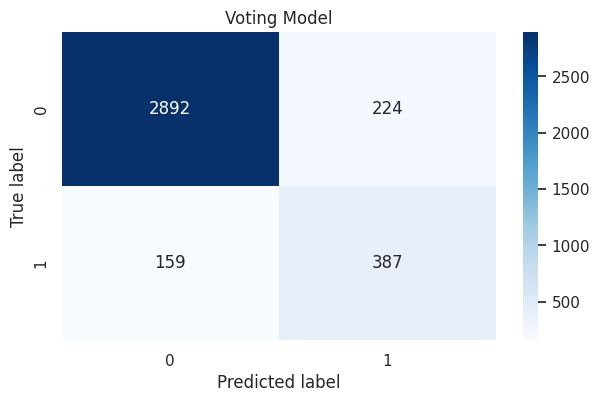

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# Define base learners with their best hyperparameters
base_learners = [
    ('svc', SVC(**best_params_svc, probability=True)),
    ('rf', RandomForestClassifier(**best_params_rf)),
    ('gb', GradientBoostingClassifier(**best_params_gb)),
    ('ab', AdaBoostClassifier(**best_params_ab)),
    ('xgb', XGBClassifier(**best_params_xgb, use_label_encoder=False, eval_metric='logloss'))
]

# Define the voting classifier, using hard voting
voting_clf = VotingClassifier(estimators=base_learners, voting='hard')

# Create a pipeline with preprocessing, SMOTE, and the voting classifier
voting_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('voting', voting_clf)
])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the voting model
voting_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_vote = voting_pipeline.predict(X_test)

# Calculate the confusion matrix and classification report
conf_matrix_vote = confusion_matrix(y_test, y_pred_vote)
class_report_vote = classification_report(y_test, y_pred_vote)

# Print the results
print("Confusion Matrix for Voting Model:")
print(conf_matrix_vote)
print("\nClassification Report for Voting Model:")
print(class_report_vote)

# Plotting the confusion matrix
plt.figure(figsize=(7, 4))
sns.heatmap(conf_matrix_vote, annot=True, fmt='d', cmap='Blues')
plt.title('Voting Model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()




---


# **Problem 3 (Clustering)**



---





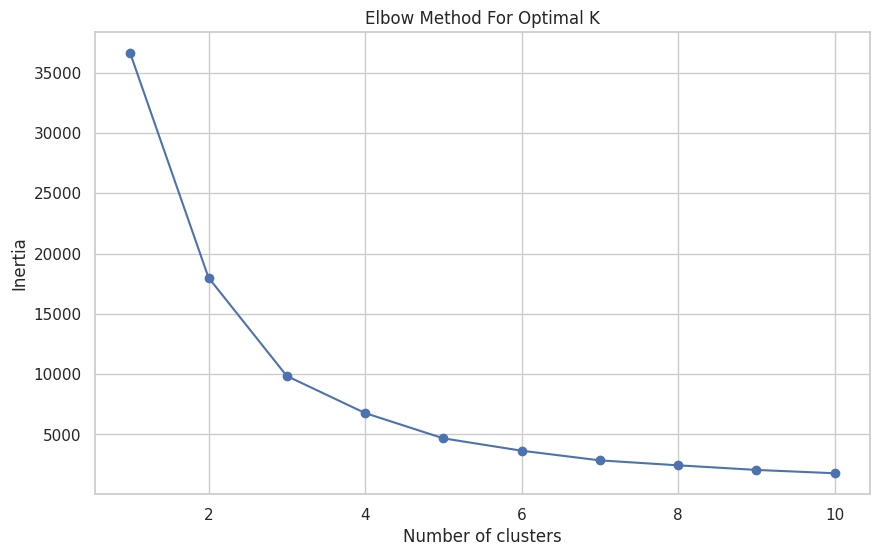

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.colors  # Importing the necessary module for custom colormap
import numpy as np

# Selecting the relevant features
features = ['Informational_Duration', 'BounceRates', 'ExitRates']
X = data[features]

# Standardising the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Elbow method for determining the optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()


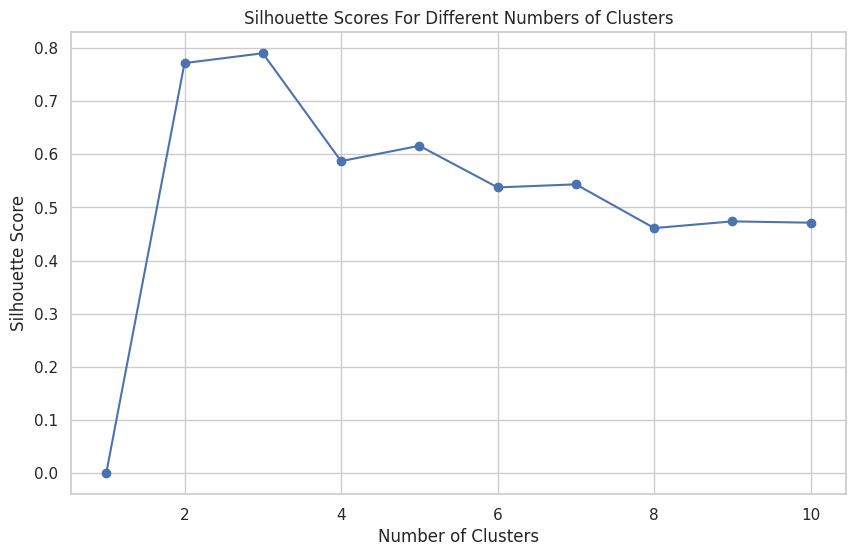

In [ ]:
from sklearn.metrics import silhouette_score

# Calculating silhouette scores for different number of clusters
silhouette_scores = []
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_pca)
    if k == 1:
        # Silhouette score is not defined for single cluster
        silhouette_scores.append(0)
    else:
        score = silhouette_score(X_pca, kmeans.labels_)
        silhouette_scores.append(score)

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Different Numbers of Clusters')
plt.show()


## 2D Cluster Plot

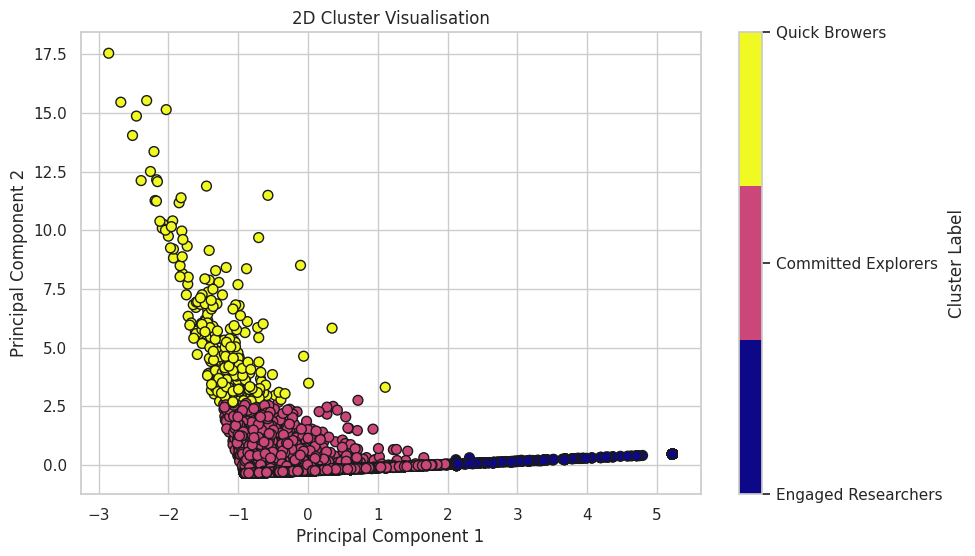

In [ ]:
import matplotlib.colors  # Importing the necessary module for custom colormap

# Applying KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(X_pca)

# Plotting the clusters with custom colors
plt.figure(figsize=(10, 6))

# Custom colors for the clusters
colors = [ '#0D0887', '#CB4779','#F0F921']

# We will plot the first two principal components
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap=matplotlib.colors.ListedColormap(colors), marker='o', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Cluster Visualisation')

# Creating a color bar with the custom colors
cbar = plt.colorbar(scatter, ticks=[0, 1, 2])
cbar.set_label('Cluster Label')
cbar.ax.set_yticklabels(['Engaged Researchers','Committed Explorers', 'Quick Browers'])  # Setting labels to clusters

plt.show()




## 3D Cluster Plot

In [ ]:
import plotly.express as px

# Creating a DataFrame for the PCA components and cluster labels
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = kmeans.labels_

import plotly.express as px
# Creating a 3D scatter plot using the suggested approach
fig = px.scatter_3d(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    z=X_pca[:, 2],
    color=kmeans.labels_,
    labels={'color': 'Cluster'},
    title='3D Cluster Visualisation'
)

fig.update_traces(marker=dict(size=3))
fig.show()

# Calculating silhouette score for 3 clusters
silhouette_score_3_clusters = silhouette_score(X_pca, kmeans.labels_)

print('The average silhouette score is :',silhouette_score_3_clusters)


The average silhouette score is : 0.7900786853834033
